# Fraud Transactions Dataset 

I've communicated my thought process/analysis/insights as comments inside the cells. Also, wherever relevant, I have explained my reasoning below the cells as a markdown



## Data Pre-processing, Data Manipulation, and Data Cleaning

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiUeLWUz0ot-5TzNxP0vjotQIThvrDycigOX2CwYiMUKwATORQBMqE
Mounted at /content/drive


In [ ]:
#Importing pandas library which will be used for loading the dataset, Data Analysis, and Data Manipulation
import pandas as pd

#Imported warnings to ignore certain warnings that might arise
import warnings
warnings.filterwarnings('ignore')

#Loading the dataset
#lines = True means reading the file as a json object per line
#'/content/drive/MyDrive/transactions.txt' is the convention to specify the path of the dataset in Google Colab
df = pd.read_json('/content/drive/MyDrive/transactions.txt', lines = True)

In [ ]:
#Examining the first 10 rows,columns,values of the dataset
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,01/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,05/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,01/2021,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,01,fastfood,08/2032,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,9.37,,,,True,,,False,False
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,04/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False


In [ ]:
#Examining the last 10 rows,columns,values of the dataset
df.tail(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
786353,732852505,732852505,50000,49796.87,2016-12-10T12:24:38,190.41,EZ Putt Putt #804489,US,US,09,01,entertainment,06/2029,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,203.13,,,,True,,,False,False
786354,732852505,732852505,50000,49606.46,2016-12-10T23:29:11,83.97,KFC #206511,US,US,05,08,fastfood,12/2030,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,393.54,,,,True,,,False,False
786355,732852505,732852505,50000,49522.49,2016-12-18T14:06:34,157.22,Uber,US,US,09,01,rideshare,08/2029,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,477.51,,,,False,,,False,False
786356,732852505,732852505,50000,49365.27,2016-12-19T03:25:53,408.83,Lyft,US,US,09,01,rideshare,06/2021,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,634.73,,,,False,,,False,False
786357,732852505,732852505,50000,48956.44,2016-12-22T07:27:23,51.48,Sunoco Gas #380975,US,US,05,08,fuel,07/2032,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1043.56,,,,True,,,False,False
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False
786362,732852505,732852505,50000,48666.83,2016-12-30T20:10:29,72.18,Uber,US,US,05,01,rideshare,05/2024,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1333.17,,,,False,,,False,False


In [ ]:
#df.values represents values row-by-row in the form of arrays
df.values

array([[737265056, 737265056, 5000, ..., '', False, False],
       [737265056, 737265056, 5000, ..., '', False, False],
       [737265056, 737265056, 5000, ..., '', False, False],
       ...,
       [732852505, 732852505, 50000, ..., '', False, False],
       [732852505, 732852505, 50000, ..., '', False, False],
       [732852505, 732852505, 50000, ..., '', False, False]], dtype=object)

In [ ]:
#Identifying the datatypes of all the features
df.dtypes

accountNumber                 int64
customerId                    int64
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                       int64
enteredCVV                    int64
cardLast4Digits               int64
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [ ]:
#Checking the number of the rows and columns 
df.shape

(786363, 29)

In [ ]:
#Checking column names
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
#Using describe function we can find out the count, mean, standard deviation, minimum, 25%th value of the feature, 50%th value of the feature, 75%th value of the feature, max values
#Describe does not work on categorical features
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [ ]:
#Importing Numpy library for replacing empty fields with NaN
import numpy as np

#Using replace function of python and NaN function of numpy. 
#For now I replaced empty fields with NaN(Not a Number) for all missing values in the dataset. This could be done feature-by-feature but I have done it all at once
#We do inplace, that is, we do not create another dataframe by performing this operation
df.replace(to_replace = '', value = np.nan, inplace = True)

#Checking if replacement has worked
df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,01,fastfood,01/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,01,fastfood,05/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,01,fastfood,01/2021,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,NaN,US,02,01,fastfood,08/2032,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,9.37,NaN,NaN,NaN,True,NaN,NaN,False,False
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,08,fastfood,04/2020,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False


Actually we should examine every feature and then find out of if the outliers in them are less than 10% of the entire feature. If it is less than 10% we should go ahead, if not we need to handle them using various methods such as Listwise, pairwise deletion, Imputation, Mean, Median, Mode etc.

**For this dataset, after analyzing I sought to fill in NaN values and later in the notebook I have handled them**

In [ ]:
#Used to get concise summary of the data, non-null counts of all features and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

We can see from performing df.info() that some features such as 'echoBuffer','merchantCity','merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' are having no values. Let's check using another way and take decision as to what has to be done for these features


In [ ]:
#Here we take the sum of all the null values for all features
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

The above operation confirms 'echoBuffer','merchantCity','merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd' have maximum null values, so let's drop these features. These features won't impact the prediction anyway

In [ ]:
#Dropping features with empty values
#axis = 1 refers to columns
df.drop(['echoBuffer','merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis = 1, inplace = True)
df = df.reset_index(drop = True)

#Let's check if it has worked
df.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [ ]:
#Checking shape after dropping features
df.shape

(786363, 23)

In [ ]:
#Examining the unique values of features
print(df['accountNumber'].unique())
print(df['customerId'].unique())
print(df['creditLimit'].unique())
print(df['availableMoney'].unique())
print(df['transactionDateTime'].unique())
print(df['transactionAmount'].unique())
print(df['merchantName'].unique())
print(df['acqCountry'].unique())
print(df['merchantCountryCode'].unique())
print(df['posEntryMode'].unique())
print(df['posConditionCode'].unique())
print(df['merchantCategoryCode'].unique())
print(df['currentExpDate'].unique())
print(df['accountOpenDate'].unique())
print(df['dateOfLastAddressChange'].unique())
print(df['cardCVV'].unique())
print(df['enteredCVV'].unique())
print(df['cardLast4Digits'].unique())
print(df['transactionType'].unique())
print(df['currentBalance'].unique())
print(df['cardPresent'].unique())
print(df['expirationDateKeyInMatch'].unique())
print(df['isFraud'].unique())

[737265056 830329091 574788567 ... 899818521 638498773 732852505]
[737265056 830329091 574788567 ... 899818521 638498773 732852505]
[ 5000  2500 50000 15000 10000   250   500  1000  7500 20000]
[ 5000.    4990.63  4959.25 ... 48766.15 48716.72 48666.83]
['2016-08-13T14:27:32' '2016-10-11T05:05:54' '2016-11-08T09:18:39' ...
 '2016-12-27T15:46:24' '2016-12-29T00:30:55' '2016-12-30T20:10:29']
[ 98.55  74.51   7.47 ... 482.13 451.71 624.07]
['Uber' 'AMC #191138' 'Play Store' ... 'ATT #141119' 'EZ Wireless #200746'
 'Runners #747070']
['US' nan 'CAN' 'MEX' 'PR']
['US' 'CAN' nan 'PR' 'MEX']
['02' '09' '05' '80' '90' nan]
['01' '08' '99' nan]
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
['06/2023' '02/2024' '08/2025' '10/2029' '01/2020' '05/2020' '01/2021'
 '08/2032' '04/2020' '05/2023' '08/2024' '12/

In [ ]:
#Finding out unique values counts
df.value_counts()

accountNumber  customerId  creditLimit  availableMoney  transactionDateTime  transactionAmount  merchantName           acqCountry  merchantCountryCode  posEntryMode  posConditionCode  merchantCategoryCode  currentExpDate  accountOpenDate  dateOfLastAddressChange  cardCVV  enteredCVV  cardLast4Digits  transactionType       currentBalance  cardPresent  expirationDateKeyInMatch  isFraud
999389635      999389635   5000         5000.00         2016-02-09T14:23:41  101.46             target.com             US          US                   05            01                online_retail         12/2019         2015-10-09       2015-10-09               140      140         3991             PURCHASE              0.00            False        False                     False      1
380680241      380680241   5000         1614.16         2016-01-02T05:19:41  22.82              Next Day eCards        US          US                   09            01                online_gifts          12/2025        

In [ ]:
#Gives count of unique values for each feature
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  3
currentBalance              487318
cardPresent                      2
expirationDateKeyInMatch         2
isFraud                          2
dtype: int64

In [ ]:
#Performs Correlation
df.corr()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
accountNumber,1.000000,1.000000,0.140673,0.066345,-0.001364,-0.011432,-0.011376,0.038517,0.162248,0.006099,-0.001057,-0.004011
customerId,1.000000,1.000000,0.140673,0.066345,-0.001364,-0.011432,-0.011376,0.038517,0.162248,0.006099,-0.001057,-0.004011
creditLimit,0.140673,0.140673,1.000000,0.834977,0.005581,0.051006,0.051088,0.125611,0.653652,-0.003929,0.002391,0.003108
availableMoney,0.066345,0.066345,0.834977,1.000000,-0.010070,0.016253,0.016323,0.073879,0.129332,0.002508,0.004067,-0.001538
transactionAmount,-0.001364,-0.001364,0.005581,-0.010070,1.000000,-0.000233,-0.000141,-0.001513,0.023905,0.037361,0.001751,0.075651
cardCVV,-0.011432,-0.011432,0.051006,0.016253,-0.000233,1.000000,0.996008,-0.011608,0.069559,-0.045319,-0.000416,0.008652
enteredCVV,-0.011376,-0.011376,0.051088,0.016323,-0.000141,0.996008,1.000000,-0.011485,0.069610,-0.045113,-0.000200,0.008655
cardLast4Digits,0.038517,0.038517,0.125611,0.073879,-0.001513,-0.011608,-0.011485,1.000000,0.124745,0.040726,0.002087,0.000886
currentBalance,0.162248,0.162248,0.653652,0.129332,0.023905,0.069559,0.069610,0.124745,1.000000,-0.010529,-0.001285,0.007715
cardPresent,0.006099,0.006099,-0.003929,0.002508,0.037361,-0.045319,-0.045113,0.040726,-0.010529,1.000000,0.040393,-0.043418


In [ ]:
df['accountNumber'].equals(df['customerId'])

True

We see that **accountNumber** and **customerId** feature are exactly same. They are highly correlated(100%) and does not contribute much to the output. This condition is called **multicollinearity**

Let's keep 1 feature and drop the other during modelling stage

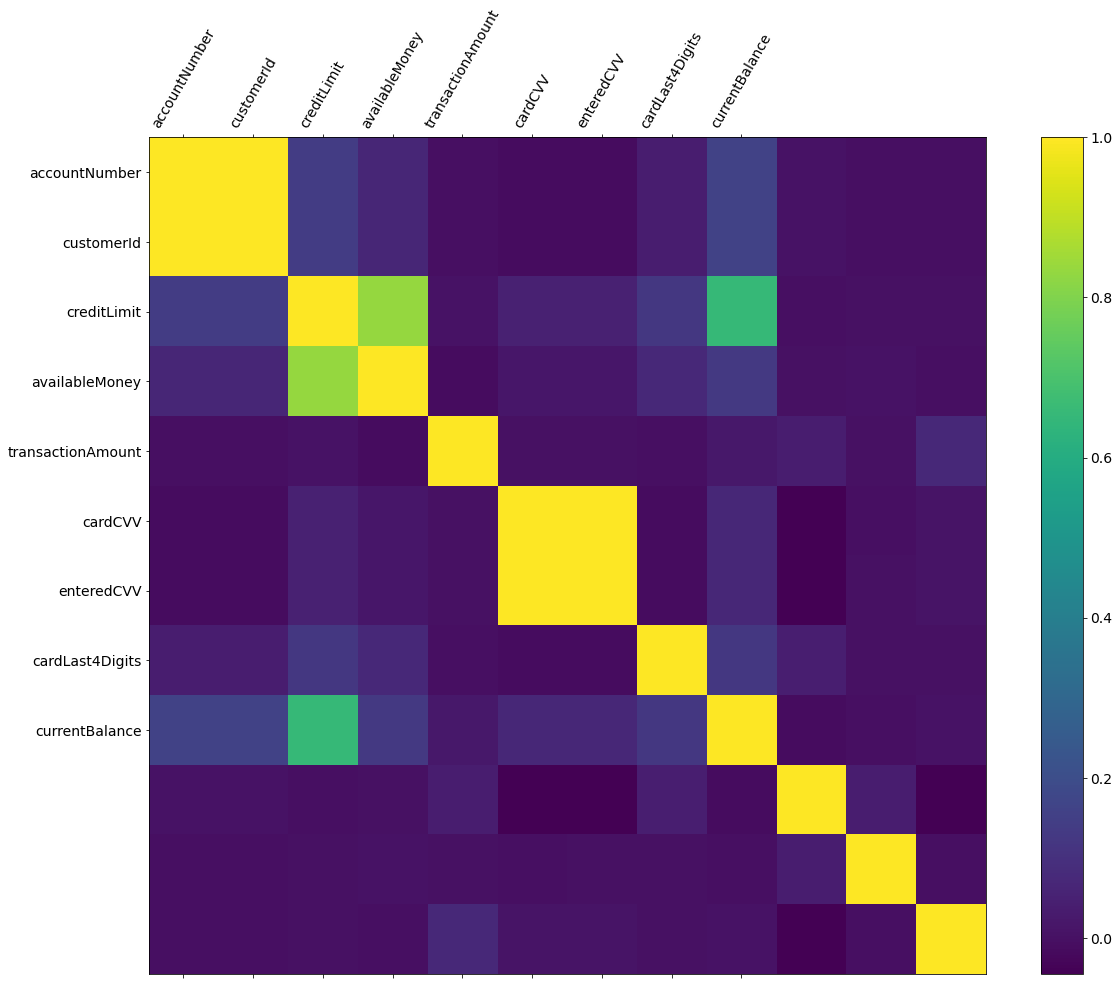

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize = (20, 15))
plt.matshow(df.corr(), fignum = f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 14, rotation = 60)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)

In [ ]:
#Checking if our dataset has duplicate values
duplicate = df.duplicated()
df[duplicate]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud


There is no duplicate record which is good.

In [ ]:
(df['creditLimit'] == df['availableMoney']).sum()

33678

There are 33678 people that have CreditLimit = AvailableMoney. This means they have not used their card for sometime. We can also say, 0.4% of the population have not used card

In [ ]:
(df['availableMoney'] > df['creditLimit']).sum()

0

Nobody has paid excess money to the card, or we can say nobody has money more than the credit limit

In [ ]:
#Caluclating the number of fraud cases in the dataset
Fraud_ = df[df['isFraud'] == True]
Valid_ = df[df['isFraud'] == False]

outlier_frac = len(Fraud_)/float(len(Valid_))

print('Outlier fraction is:', outlier_frac)
print('Fraud Cases Count is: {}'.format(len(df[df['isFraud'] == True])))
print('Valid Transactions Count is: {}'.format(len(df[df['isFraud'] == False])))

Outlier fraction is: 0.016043754990658264
Fraud Cases Count is: 12417
Valid Transactions Count is: 773946


In [ ]:
#Amount details of fraudulent transaction
print('Amount details of fraudulent transaction')
print(Fraud_.transactionAmount.describe())

#Details of valid transaction
print('\nDetails of valid transaction')
print(Valid_.transactionAmount.describe())

Amount details of fraudulent transaction
count    12417.000000
mean       225.215905
std        189.551393
min          0.000000
25%         86.000000
50%        176.980000
75%        311.460000
max       1608.350000
Name: transactionAmount, dtype: float64

Details of valid transaction
count    773946.000000
mean        135.570249
std         146.525305
min           0.000000
25%          33.190000
50%          86.760000
75%         189.390000
max        2011.540000
Name: transactionAmount, dtype: float64


## Data Visualization

In [ ]:
#Using Matplotlib and Seaborn for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

Text(0.5, 1.0, 'Transaction Amount Histogram')

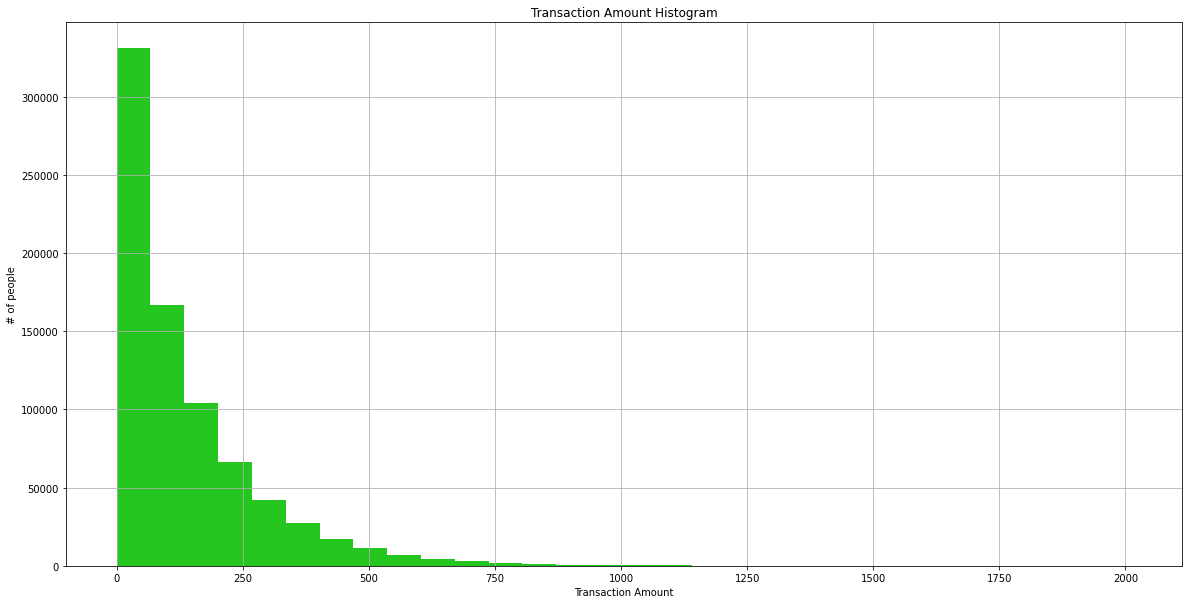

In [ ]:
#Creating histogram of Transaction Amount
plt.figure(figsize = (20,10))
df['transactionAmount'].hist(bins = 30, color = '#24C61F')
plt.xlabel("Transaction Amount")
plt.ylabel("# of people")
plt.title('Transaction Amount Histogram')

Transaction Amount feature is right skewed. It makes sense as not a lot of people spend huge amounts everytime they go out to buy something

Above visualization confirms that majority people spend less than $150

Text(0.5, 1.0, 'Available Money Histogram')

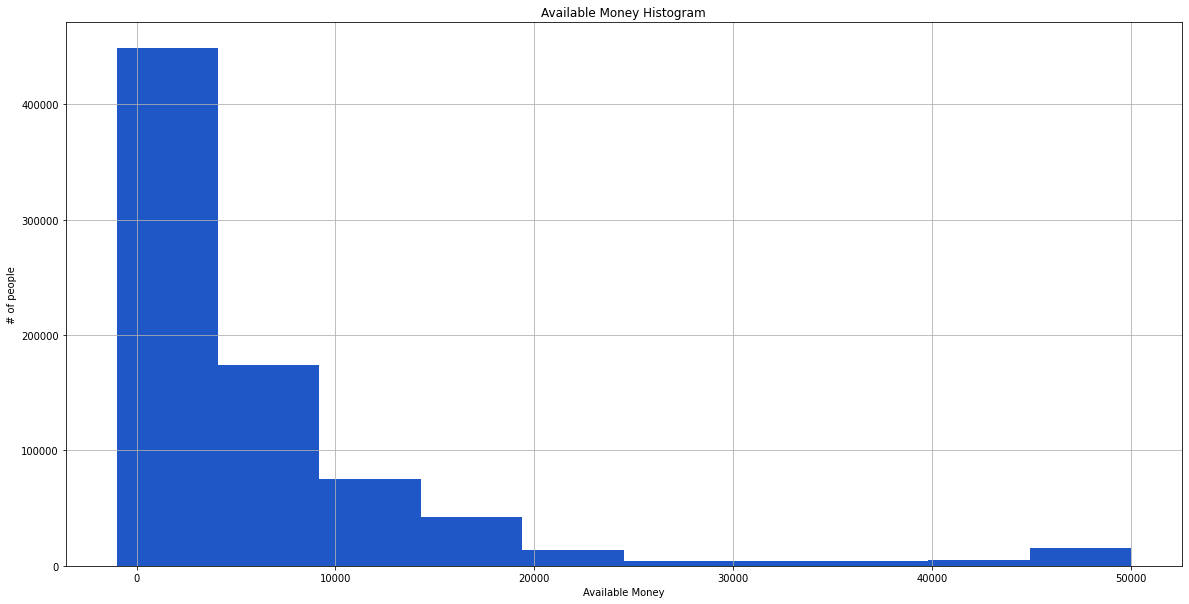

In [ ]:
#Creating histogram of Available Money
plt.figure(figsize = (20,10))
df['availableMoney'].hist(bins = 10, color = '#1F57C6')
plt.xlabel("Available Money")
plt.ylabel("# of people")
plt.title('Available Money Histogram')

~ 5000 USD is the available money with most people. This feature is right skewed too. There is an outlier between 40000 and 50000

Text(0.5, 1.0, 'Credit Limit Histogram')

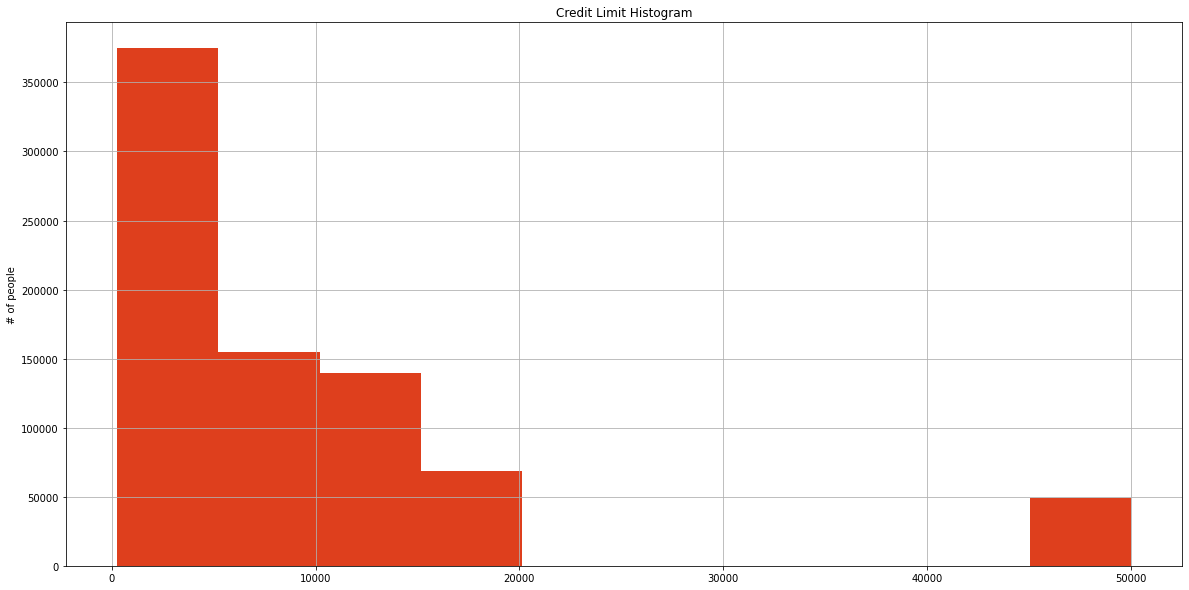

In [ ]:
#Creating histogram of Credit Limit
plt.figure(figsize = (20,10))
df['creditLimit'].hist(color = '#DE3F1D')
plt.ylabel("# of people")
plt.title('Credit Limit Histogram')

There are outliers between 45000 and 50000 and the data is right skewed

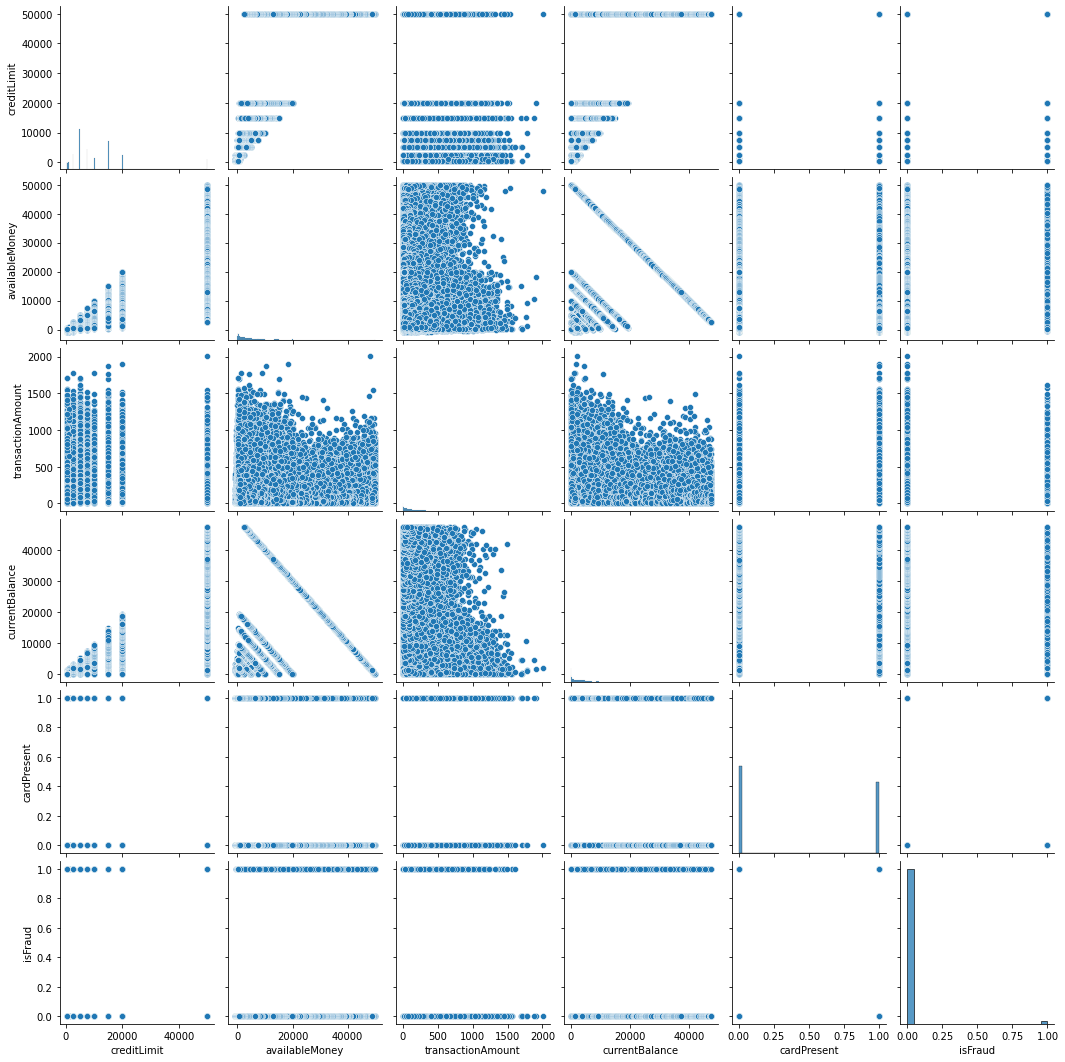

In [ ]:
df_pair_plot = pd.DataFrame()
df_pair_plot = df.copy()
df_pair_plot.drop(df.columns.difference(['creditLimit','availableMoney', 'transactionAmount', 'merchantName', 'acqCountry', 'merchantCountryCode', 
                                         'posEntryMode', 'posConditionCode','merchantCategoryCode','transactionType', 'currentBalance', 'cardPresent',
                                         'isFraud']), axis = 1, inplace=True)
g = sns.pairplot(df_pair_plot)

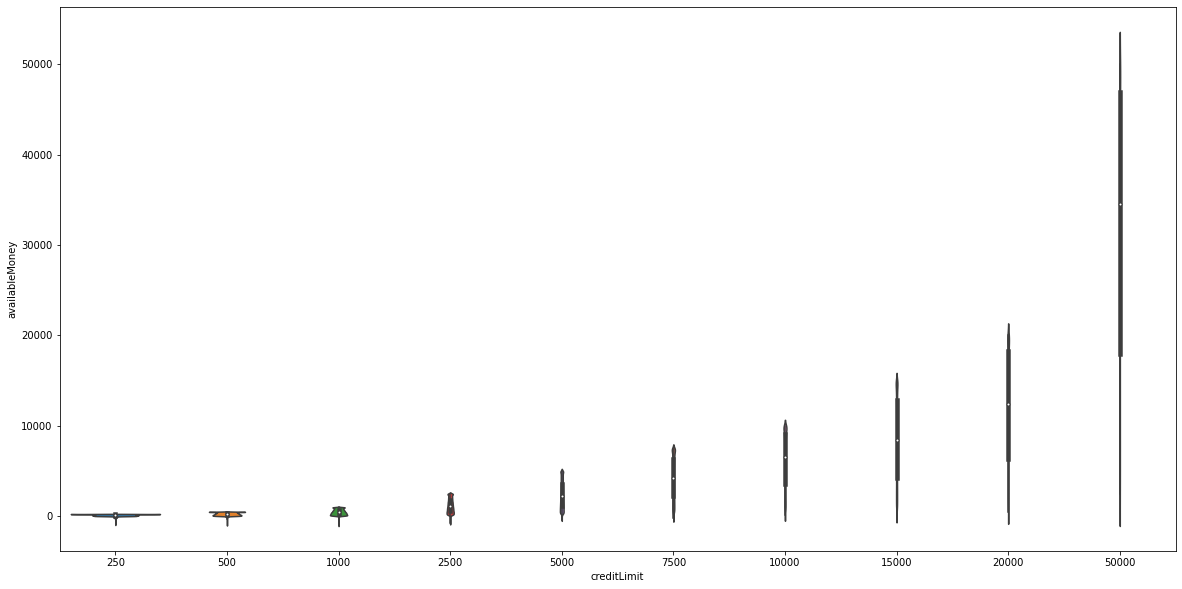

In [ ]:
#Violin plot between credit limit and available money
plt.figure(figsize = (20,10))
sns.violinplot(x = df['creditLimit'], y = df['availableMoney'], data = df)

Text(0, 0.5, 'Transaction Amount')

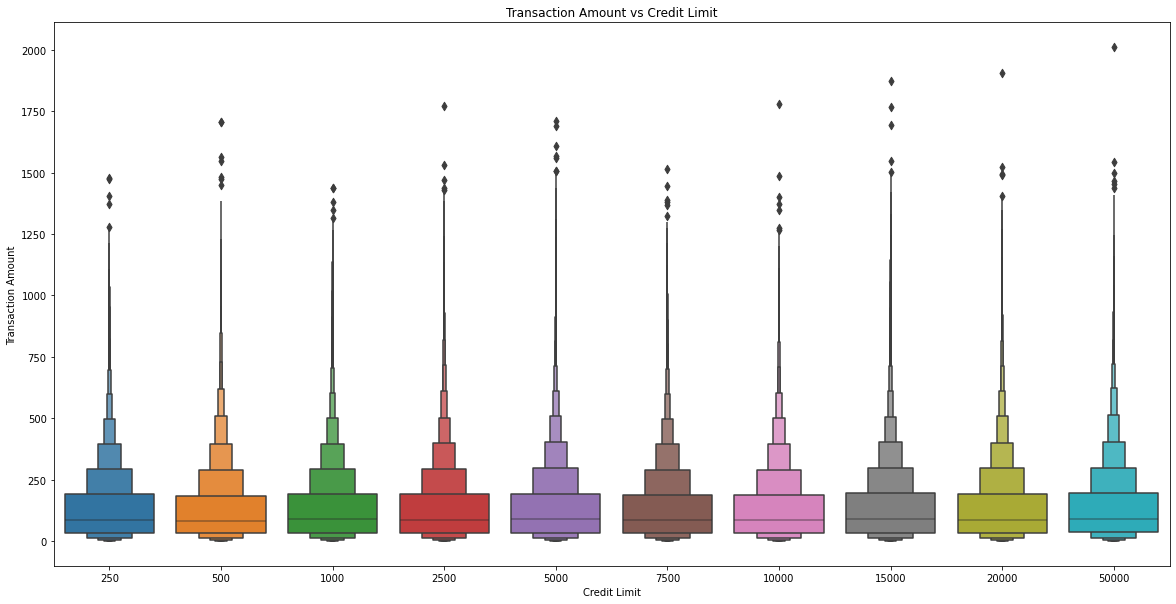

In [ ]:
#Box plot of Credit Limit vs Transaction Amount
plt.figure(figsize = (20,10))
sns.boxenplot(x = df['creditLimit'], y = df['transactionAmount'])
plt.title('Transaction Amount vs Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Transaction Amount')

Outliers are described as hexagon shape. I conclude 0 - 250 is the common range of transaction amounts

Text(0, 0.5, 'Available Money')

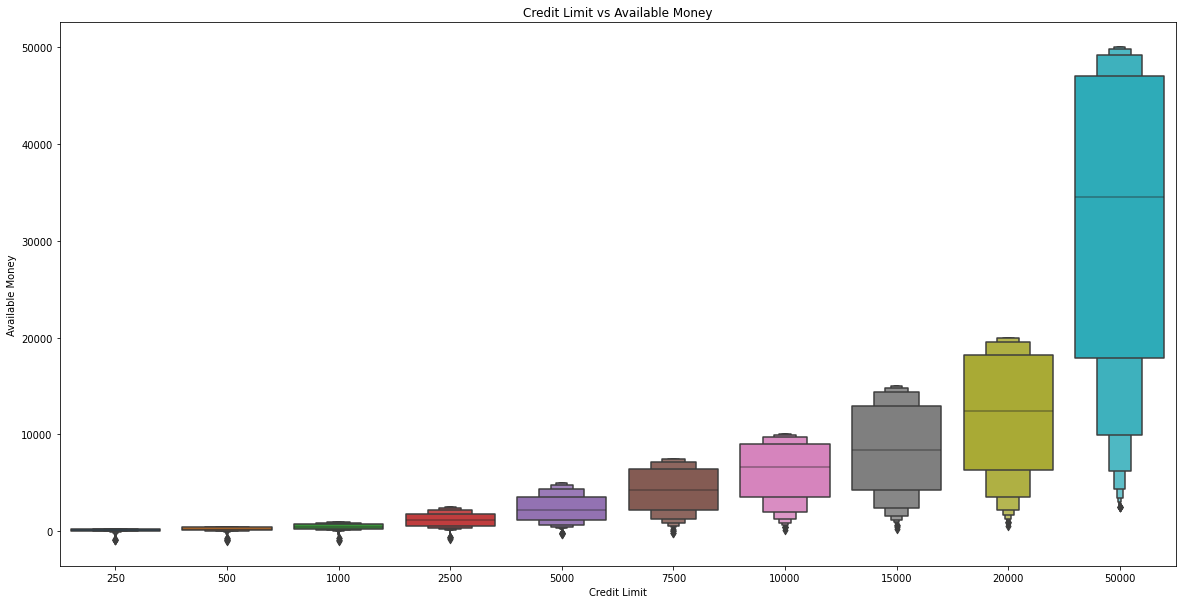

In [ ]:
#Box plot of Credit Limit vs Available Money
plt.figure(figsize = (20,10))
sns.boxenplot(x = df['creditLimit'], y = df['availableMoney'])
plt.title('Credit Limit vs Available Money')
plt.xlabel('Credit Limit')
plt.ylabel('Available Money')

As credit limit increases, available money also increases

Text(0, 0.5, 'Transaction Amount')

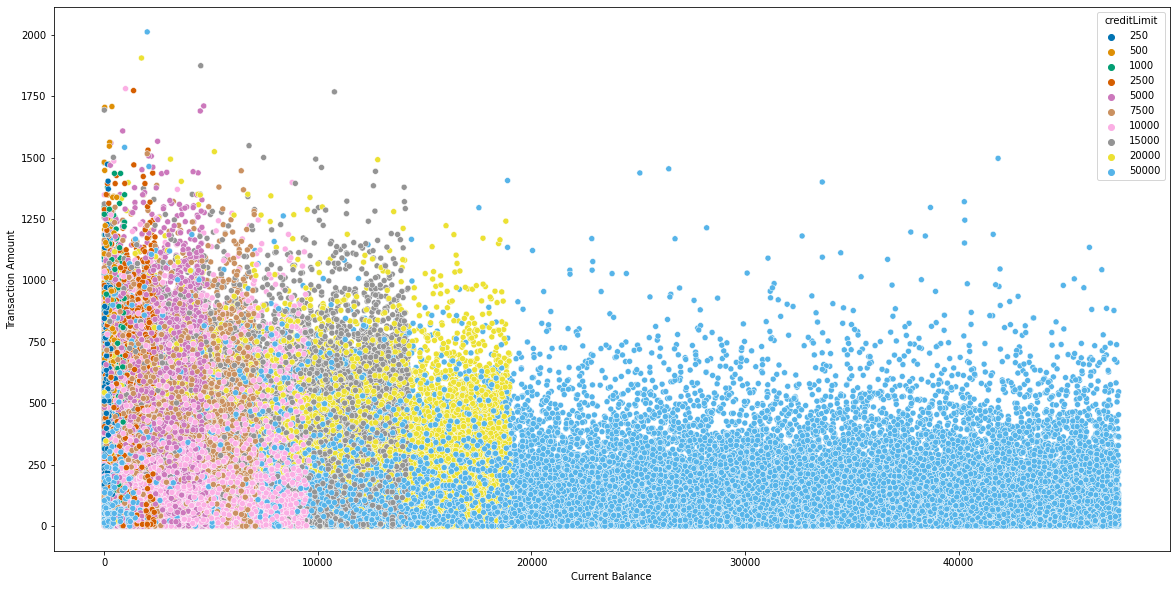

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'currentBalance', y = 'transactionAmount', data = df, hue = 'creditLimit', palette = 'colorblind')
plt.xlabel('Current Balance')
plt.ylabel('Transaction Amount')

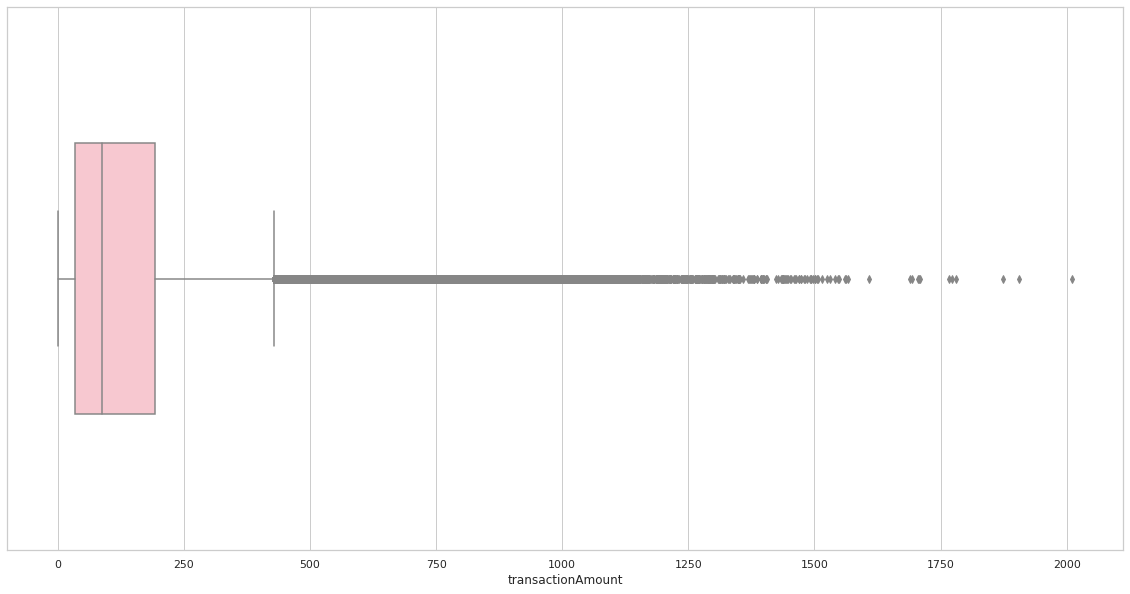

In [ ]:
#Boxplot of transaction Amount
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['transactionAmount'], color="pink", width=0.5)

Transaction Amount does have some outliers

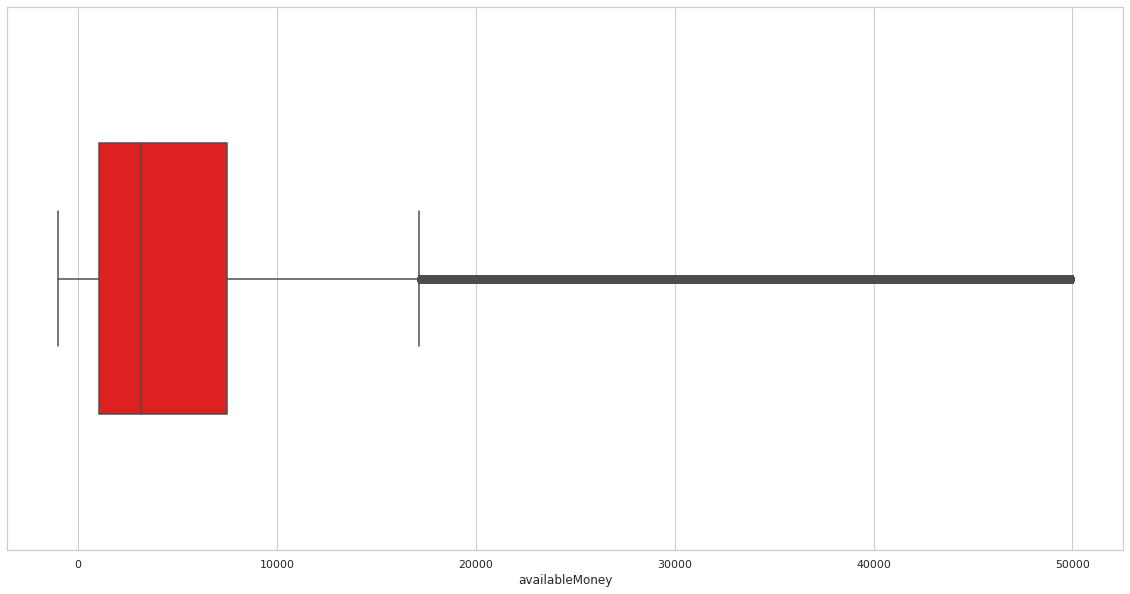

In [ ]:
#Boxplot of availableMoney
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['availableMoney'], color="red", width=0.5)

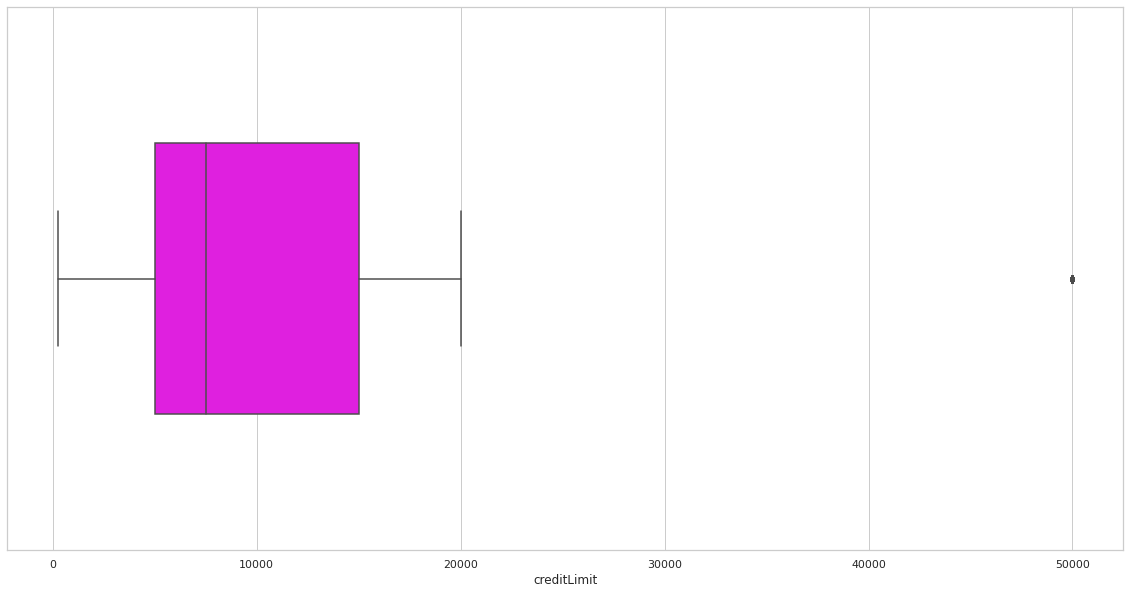

In [ ]:
#Boxplot of creditLimit
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['creditLimit'], color="magenta", width=0.5)

One outlier at the right far end is visible

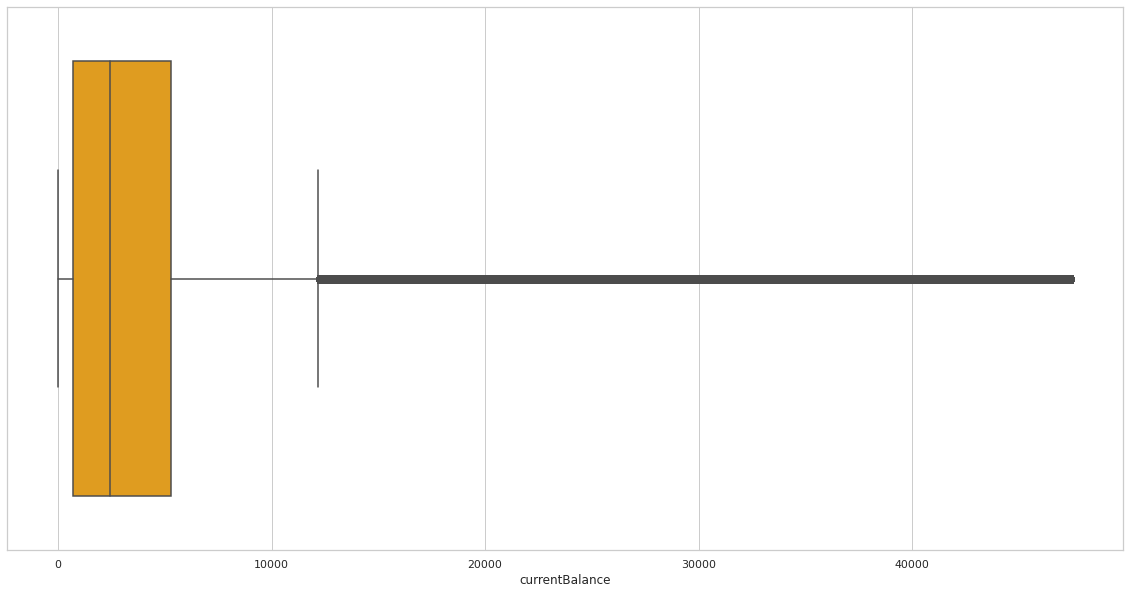

In [ ]:
#Boxplot of currentBalance
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = df['currentBalance'], color = "orange")

Text(0.5, 1.0, 'Comparing Transactions between Fraud and Authentic')

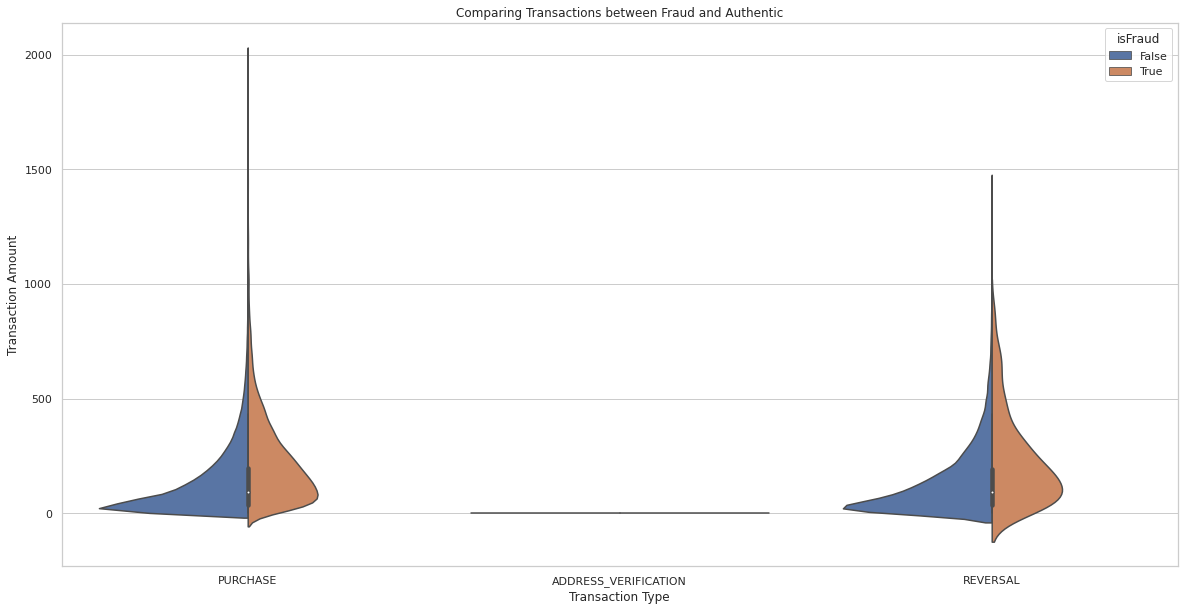

In [ ]:
plt.figure(figsize=(20,10))
sns.violinplot(data = df, y = 'transactionAmount', x = 'transactionType', hue = 'isFraud', split = True)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Comparing Transactions between Fraud and Authentic')

Text(0, 0.5, 'Transaction Amount')

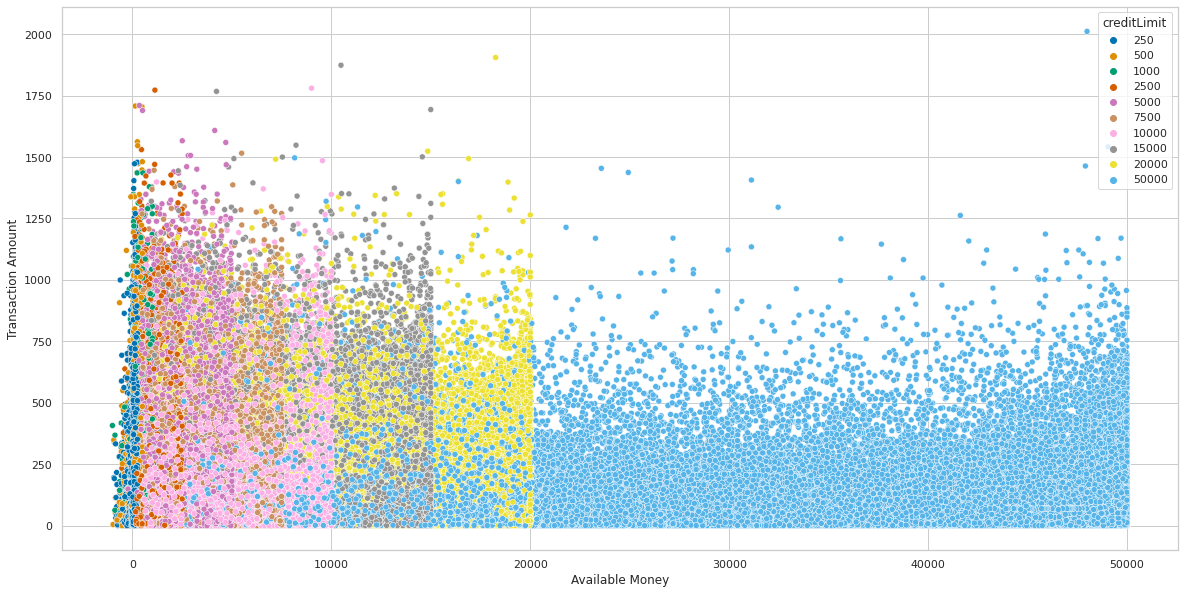

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = 'availableMoney', y = 'transactionAmount', data = df, hue = 'creditLimit',palette='colorblind')
plt.xlabel('Available Money')
plt.ylabel('Transaction Amount')

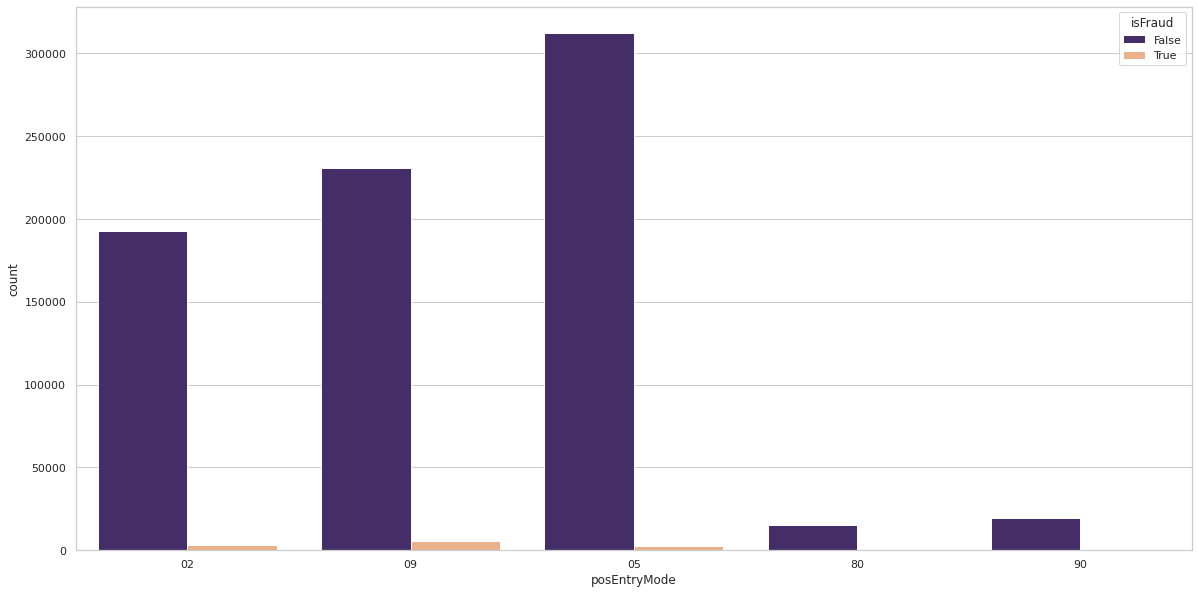

In [ ]:
#Countplot of posEntryMode with hue(sprinkle of isFraud feature)
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='posEntryMode', hue='isFraud',palette=['#432371',"#FAAE7B"])

posEntryMode 05 is the most common. Also, POS Entry Mode 09 has slightly more fraud cases

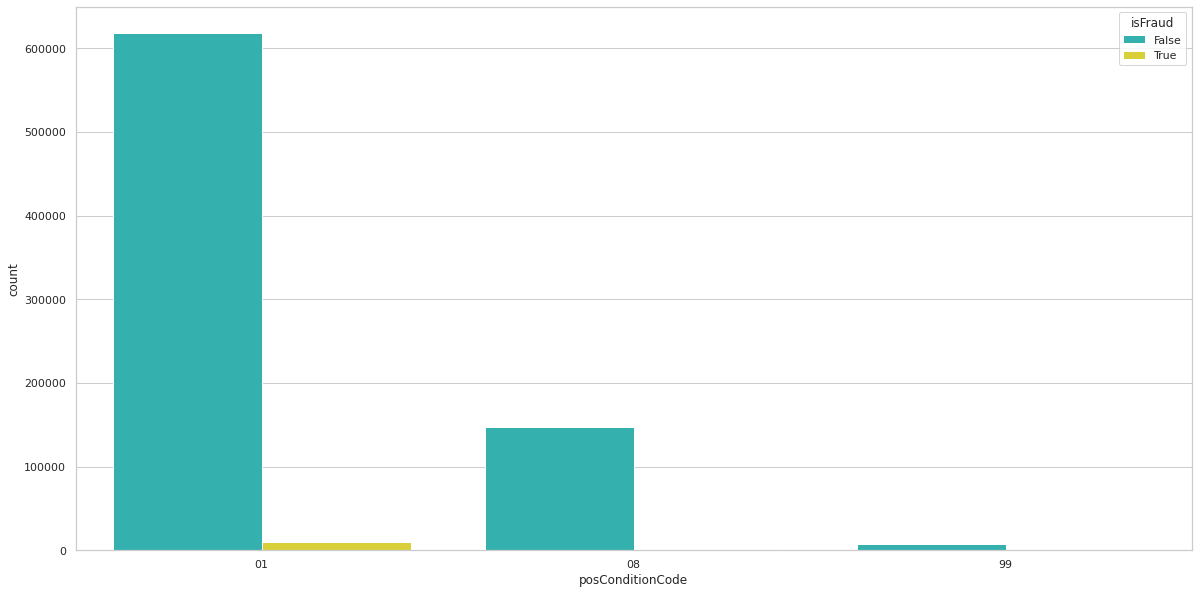

In [ ]:
#Countplot of posConditionCode with hue(sprinkle) of isFraud feature
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='posConditionCode', hue='isFraud', palette=['#1FC6C3',"#F4E71E"])

posConditionCode 01 is the most frequent

Text(0.5, 1.0, 'Relationship between Card Present Transactions and Fraudulent Transactions')

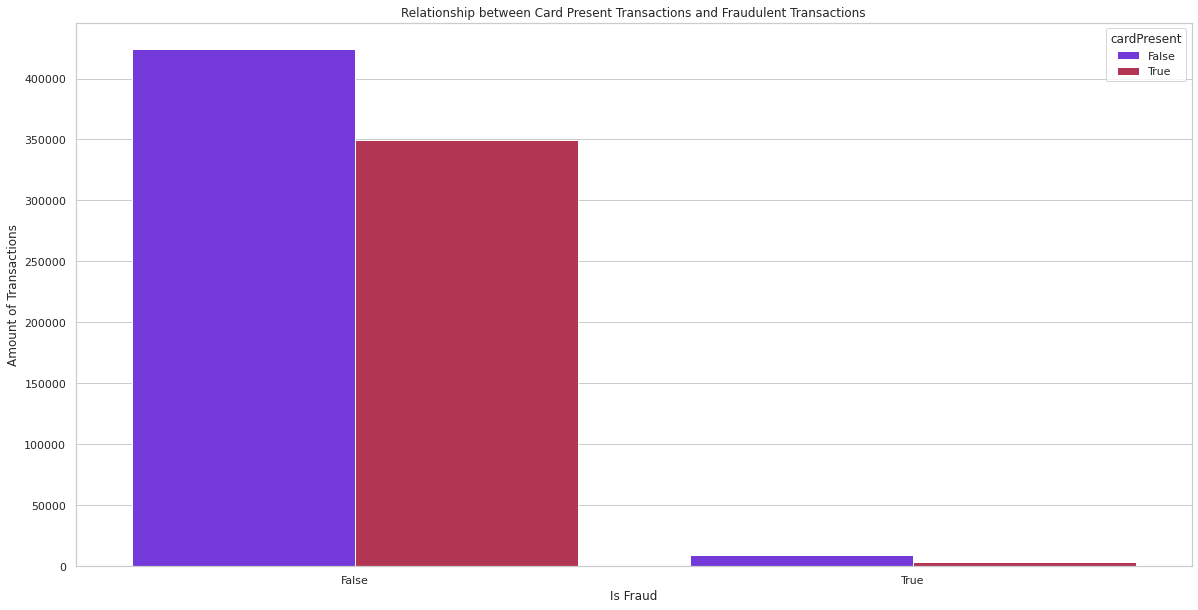

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x ='isFraud', hue = 'cardPresent', palette = ['#6C1EF4',"#C82049"], dodge = True)
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Relationship between Card Present Transactions and Fraudulent Transactions')

From the above chart, whenever the cardPresent is False there are slightly more fraud

Text(0, 0.5, 'Count')

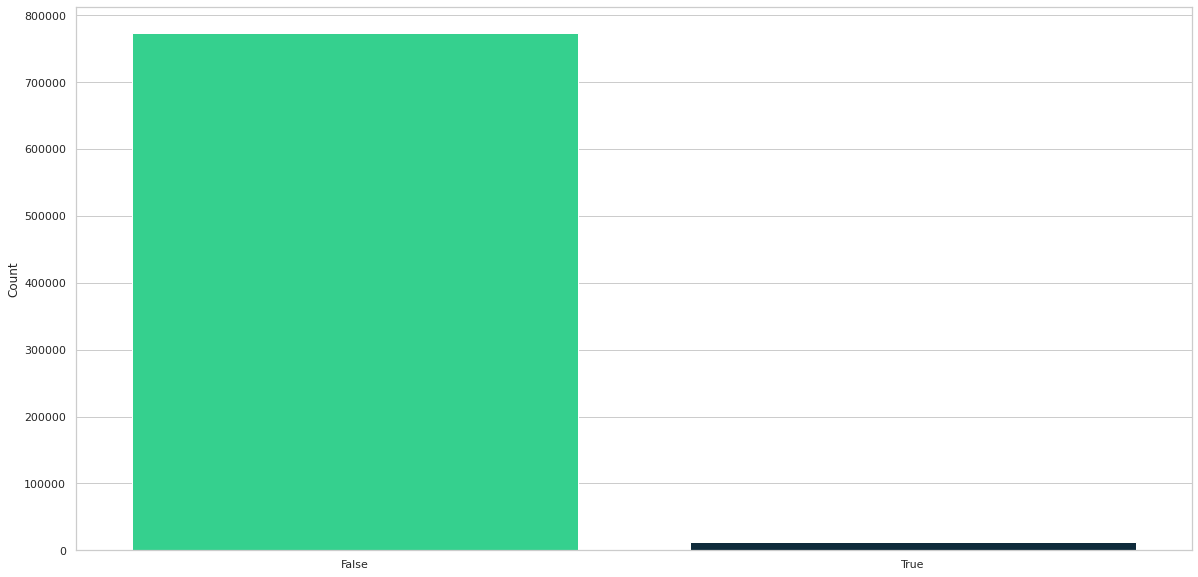

In [ ]:
plt.figure(figsize=(20,10))
fraud_vals = df['isFraud'].value_counts()

sns.barplot(x=[0,1], y=fraud_vals,palette=['#1BEA92',"#082D42"])
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')

Dataset has very less Fraud Cases. Undersampling is so needed!

Text(0.5, 1.0, '% Corelation Matrix')

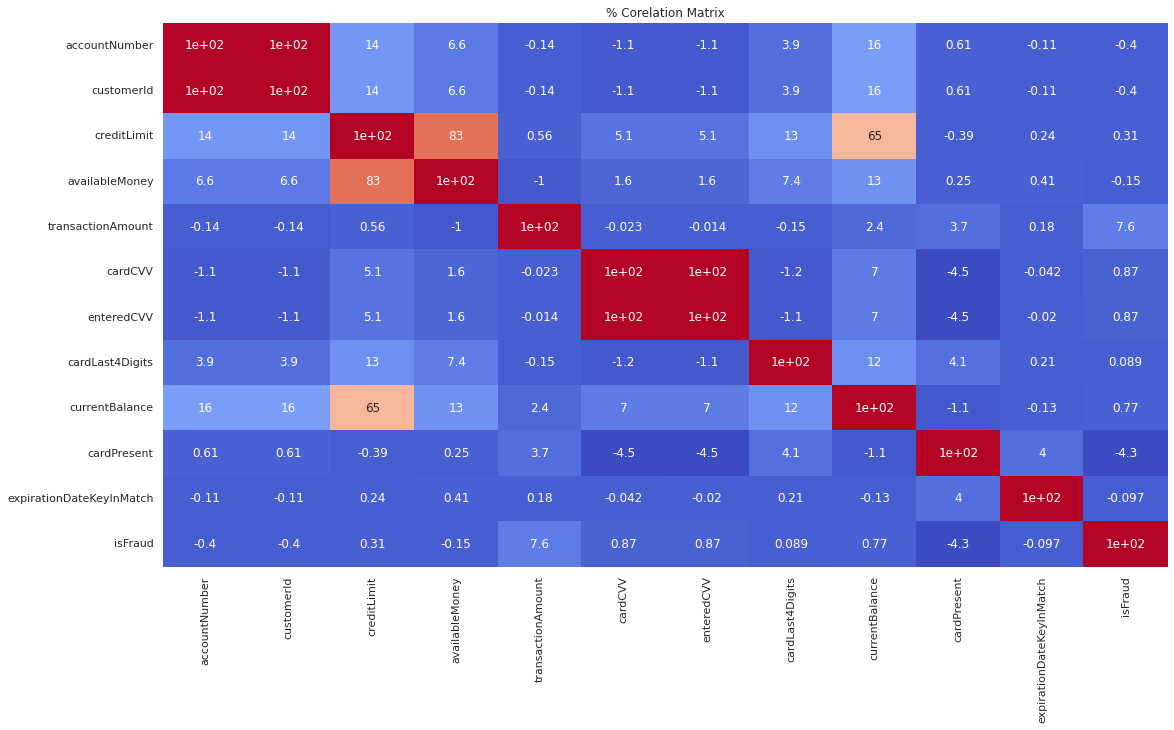

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(cbar=False, annot=True, data=df.corr()*100, cmap='coolwarm')
plt.title('% Corelation Matrix')

[]

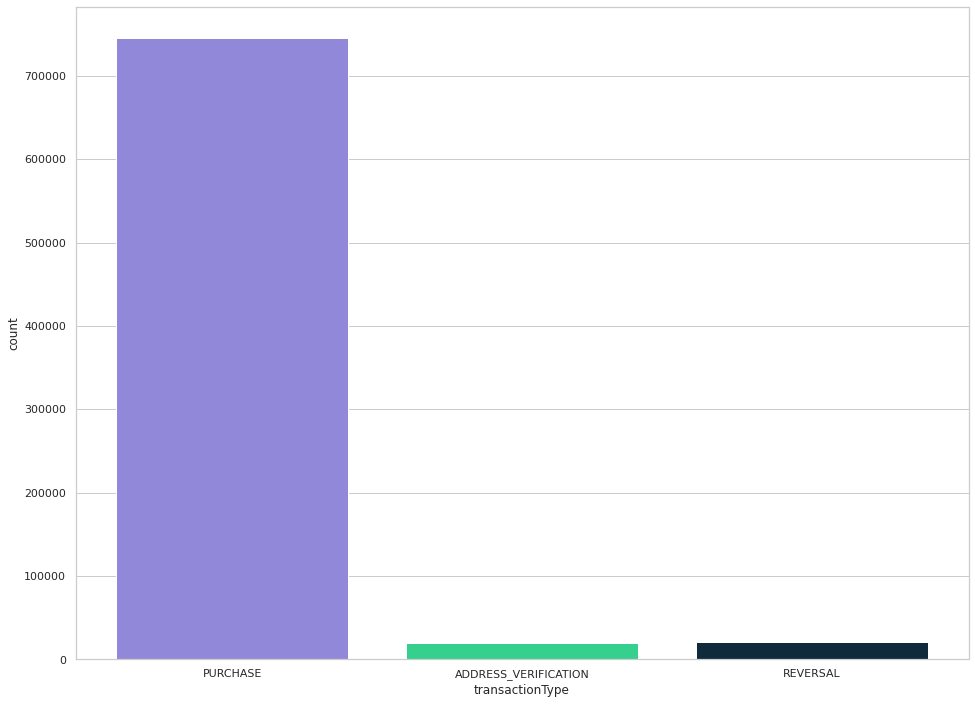

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.countplot(data = df, x = 'transactionType', palette=["#877AE8", '#1BEA92',"#082D42", "#175911"])
plt.plot()

As expected Purchases are more. Also, Address Verification and Reversal is almost same

[]

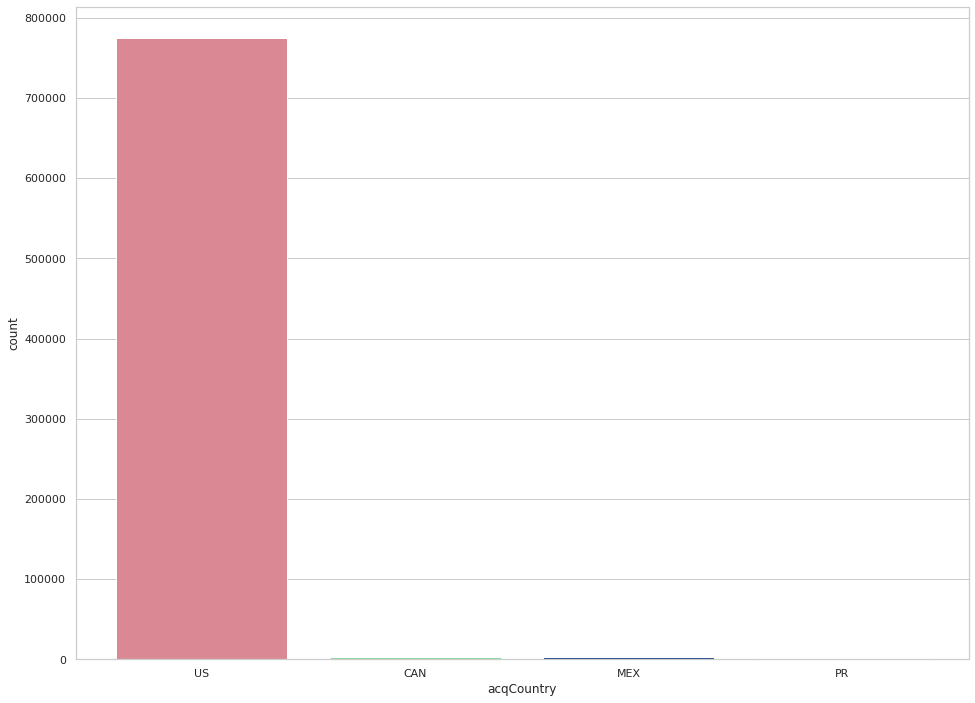

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.countplot(data = df, x = 'acqCountry' , palette=["#E87A89", '#7AE896',"#0D479C", "#175911"])
plt.plot()

US has more than 3 times the total of CAN, MEX and PR. So, we can safely say that fraud detection prediction will be more accurate when it's implemented in the US

[]

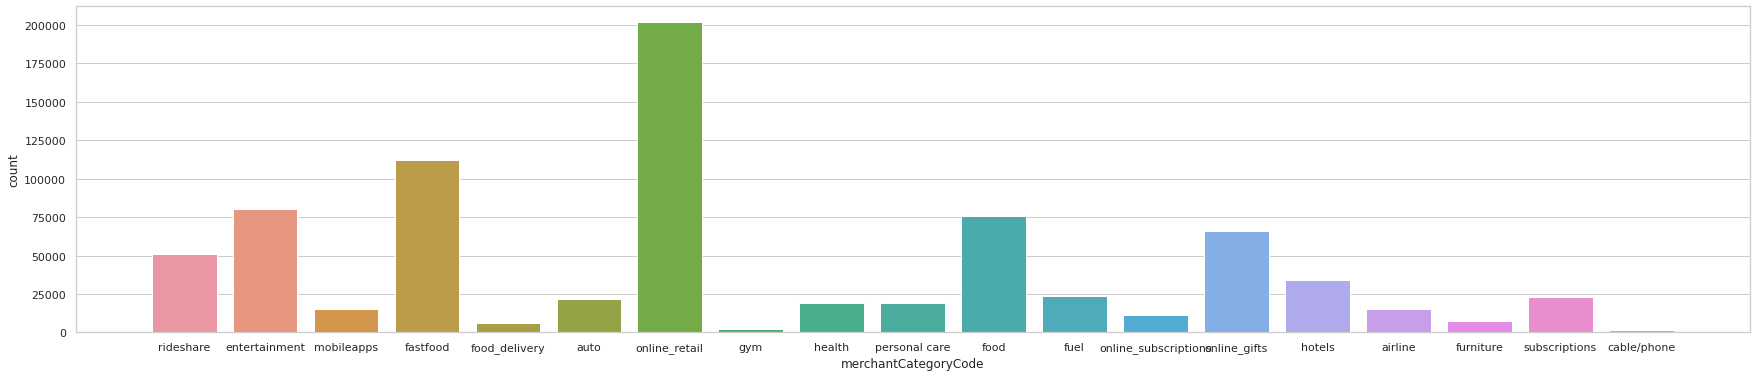

In [ ]:
plt.figure(figsize=(30,6))
ax = sns.countplot(data=df, x='merchantCategoryCode')
plt.plot()

Just like I thought, people spend a lot in e-commerce platforms. Surprising that gym and cable/phone has some transactions too

[]

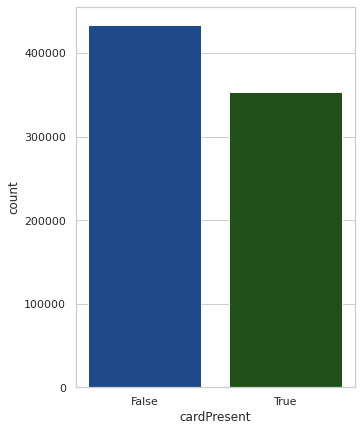

In [ ]:
plt.figure(figsize=(5,7))
ax = sns.countplot(data = df, x = 'cardPresent', palette=["#0D479C", "#175911"])
plt.plot()

Looks like people without card are more than with the card

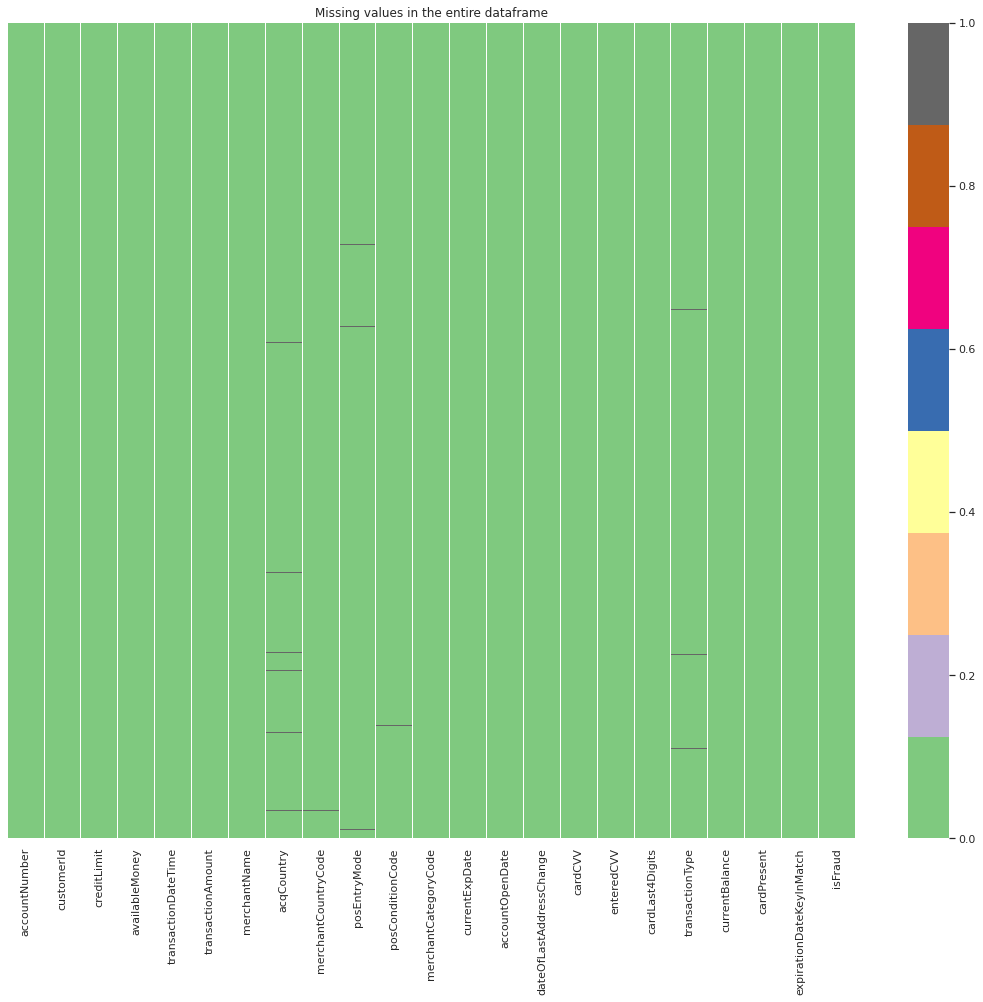

In [ ]:
#Visualizing missing data. Plotting to see the missing date for features
plt.figure(figsize=(19, 15))
sns.heatmap(df.isnull(),cmap='Accent',cbar=True,yticklabels=False)
plt.title('Missing values in the entire dataframe')
plt.show()

Not a whole lot of missing values. Dataset has huge number of rows and columns, so, relatively missing values is less. 



You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.

Can you programmatically identify reversed and multi-swipe transactions?
What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
Did you find anything interesting about either kind of transaction?

**MultiSwipe**

In [ ]:
#Extracting 2 columns from df into df_problem3
df_problem3 = df[["accountNumber","transactionAmount"]]

#Removing 'T' from the transaction date time feature and then appending an empty string
df_conv = df["transactionDateTime"].str.split("T", n = 1, expand = True)
df_conv = df_conv[0] + ' ' + df_conv[1]

#Converting the series into dataframe with column name as 'A'
df2 = pd.DataFrame(df_conv, columns = list('A'))
df2['A'] = pd.to_datetime(df2.A)

#Concatenation of df_problem3 and df2
df3 = pd.concat([df_problem3, df2], axis = 1)
df3.head(10)

,accountNumber,transactionAmount,A
0,737265056,98.55,2016-08-13 14:27:32
1,737265056,74.51,2016-10-11 05:05:54
2,737265056,7.47,2016-11-08 09:18:39
3,737265056,7.47,2016-12-10 02:14:50
4,830329091,71.18,2016-03-24 21:04:46
5,830329091,30.76,2016-04-19 16:24:27
6,830329091,57.28,2016-05-21 14:50:35
7,830329091,9.37,2016-06-03 00:31:21
8,830329091,523.67,2016-06-10 01:21:46
9,830329091,164.37,2016-07-11 10:47:16


In [ ]:
#Considering minutes as 5. All the duplicates within 5 mins of first swipe are calculated
minutes5 = pd.Timedelta(minutes = 5)    
df3['Duplicate'] = df3.sort_values('A').groupby(['accountNumber','transactionAmount']).A.diff().abs().le(minutes5).astype(int)
df3.head(10)

,accountNumber,transactionAmount,A,Duplicate
0,737265056,98.55,2016-08-13 14:27:32,0
1,737265056,74.51,2016-10-11 05:05:54,0
2,737265056,7.47,2016-11-08 09:18:39,0
3,737265056,7.47,2016-12-10 02:14:50,0
4,830329091,71.18,2016-03-24 21:04:46,0
5,830329091,30.76,2016-04-19 16:24:27,0
6,830329091,57.28,2016-05-21 14:50:35,0
7,830329091,9.37,2016-06-03 00:31:21,0
8,830329091,523.67,2016-06-10 01:21:46,0
9,830329091,164.37,2016-07-11 10:47:16,0


In [ ]:
#Pulling out multiswipe transaction, so, where ever df3['duplicate'] = 1, it is a multiswipe transaciton
df_multiswipe = df3[df3['Duplicate'] == 1]

In [ ]:
#Summation of Dollar amount for multiswipe transactions
print('Summation of Dollar amount for multiswipe transactions is $', round(df_multiswipe.transactionAmount.sum(),3))

Summation of Dollar amount for multiswipe transactions is $ 1933949.11


In [ ]:
#Total number of multi-swipe transactions
df_multiswipe['transactionAmount'].shape

(13417,)

**13,417 is the total number of multi-swipe transactions**

**$1,933,949.11 is the summation of dollar amount for multi swipe transaction**

**Reversal**

In [ ]:
#I assumed all reversals happen soon after a purchase, so, based on that I created a new dataframe that extracts 'reversal' transaction types from
#parent dataframe(df)
df_reversal = pd.DataFrame()
df_reversal = df[df['transactionType'] == 'REVERSAL'] 
df_reversal.drop(df_reversal.columns.difference(['accountNumber','transactionAmount', 'availableMoney']), 1, inplace=True)
print(df_reversal.head(5))

#Summation of Dollar amount for reversal transactions
print('\nSummation of Dollar amount for reversal transactions $', round(df_reversal.transactionAmount.sum(),3))

#Total reversal transactions
print('\nTotal reversal transactions:', len(df_reversal.transactionAmount))

     accountNumber  availableMoney  transactionAmount
39       574788567         2200.98             215.13
73       574788567         2432.72               3.87
101      924729945        49831.43             168.57
133      984504651        46367.41             450.74
156      984504651        41909.30              81.73

Summation of Dollar amount for reversal transactions $ 2821792.5

Total reversal transactions: 20303


**20,303 is the total number of reverse transactions**

**$2821792.5 is the summation of dollar amount for reversed transaction**

Also, transactionType feature has missing values, ~ 698. Some of these transactions could also be classified as 'Reversal' but it can also be thought of as swiping twice(Ex: failed transaction, buying the same item for 2 people are the reasons). So, I did not consider it in my calculation as the data are not labeled.

## Feature Engineering and Feature Scaling

In [ ]:
#Adding a new feature called difference_of_LastAddress_Change_and_Account_Open_date 

#Convert 'dateOfLastAddressChange' and 'accountOpenDate' features to datetime using pandas library
df['dateOfLastAddressChange'] = pd.to_datetime(df.dateOfLastAddressChange)
df['accountOpenDate'] = pd.to_datetime(df.accountOpenDate)

#Subtracting 'dateOfLastAddressChange' and 'accountOpenDate'. After that, replaced 'days' with empty string considering regular expression and converted to integer
df['difference_of_LastAddress_Change_and_Account_Open_date'] = (df['dateOfLastAddressChange'] - df['accountOpenDate'])
df['difference_of_LastAddress_Change_and_Account_Open_date'] = df['difference_of_LastAddress_Change_and_Account_Open_date'].replace('days', '', regex = True).astype(int)

**There might be genuine reason to change address. I'm trying to find out if people who have changed address are more likely to cause fraud or not. So, I created a new feature called 'difference_of_LastAddress_Change_and_Account_Open_date' to capture my observation**

In [ ]:
#Finding unique items from df['difference_of_LastAddress_Change_and_Account_Open_date']
df['difference_of_LastAddress_Change_and_Account_Open_date'].nunique()

1349

In [ ]:
#Adding a new feature called 'mismatchCVV'. So, here I consider a new feature which will have binary digits (0 and 1)
df['mismatchCVV'] = (df['cardCVV'] != df['enteredCVV'])

#We can also consider creating a feature wherein the feature has values only where cardCVV and enteredCVV match(Basically same as above)
#df['mismatchCVV'] = (df['cardCVV'] == df['enteredCVV'])

**In the above case, I consider the possibility that a fraudster is trying to guess or input wrong CVV. This could also be legitimate card holder mistyping. Let's keep it in our dataframe for further analysis**

In [ ]:
df['mismatchCVV'].value_counts()

False    779348
True       7015
Name: mismatchCVV, dtype: int64

**The count of mismatches are very less, literally 0.9% of the total values are mismatches**

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#X_train["accountNumber"] = labelencoder.fit_transform(X_train["accountNumber"]) #Should be done as part of training and then use .transform() to transform the test data

 **1. Account numbers and customerIds are assumed as randomly generated numbers assigned to customers, so, I consider it as categorical, I did not consider LabelEncoding and One Hot Encoding because my Colab crashes due to exceeding RAM limits for free tier session. I wish I could do this!**

**2. merchantName has lot of unique values. Due to Colab's free tier limits I could not engineer this feature too**

In [ ]:
#Splitting transactionDateTime feature to create 2 separate features namely - Transaction_Date and Transaction_time
new = df["transactionDateTime"].str.split("T", n = 1, expand = True)
df["Transaction_Date"]= new[0]
df["Transaction_Time"]= new[1]

df.drop(columns =["transactionDateTime"], inplace = True)

In [ ]:
# Create features for year, month, day, hour, and minute of Transaction_Date and Transaction_Time
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], errors='coerce')

df['Txn_year'] = df['Transaction_Date'].dt.year
df['Txn_month'] = df['Transaction_Date'].dt.month
df['Txn_day'] = df['Transaction_Date'].dt.day
df['Txn_hour'] = df['Transaction_Time'].dt.hour
df['Txn_minute'] = df['Transaction_Time'].dt.minute
df['Txn_second'] = df['Transaction_Time'].dt.second

#Drop the columns
df.drop(columns =["Transaction_Date", 'Transaction_Time'], inplace = True)

In [ ]:
#Create feature for year, month, day of 'accountOpenDate' feature
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'], errors = 'coerce')

df['acc_open_yr'] = df['accountOpenDate'].dt.year
df['acc_open_month'] = df['accountOpenDate'].dt.month
df['acc_open_date'] = df['accountOpenDate'].dt.day

In [ ]:
#Create feature for year, month, day of 'dateOfLastAddressChange' feature
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'], errors='coerce')

df['lastaddress_yr'] = df['dateOfLastAddressChange'].dt.year
df['lastaddress_month'] = df['dateOfLastAddressChange'].dt.month
df['lastaddress_date'] = df['dateOfLastAddressChange'].dt.day

In [ ]:
#Taking a look at the changes
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,difference_of_LastAddress_Change_and_Account_Open_date,mismatchCVV,Txn_year,Txn_month,Txn_day,Txn_hour,Txn_minute,Txn_second,acc_open_yr,acc_open_month,acc_open_date,lastaddress_yr,lastaddress_month,lastaddress_date
0,737265056,737265056,5000,5000.0,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False,0,False,2016,8,13,14,27,32,2015,3,14,2015,3,14
1,737265056,737265056,5000,5000.0,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False,0,False,2016,10,11,5,5,54,2015,3,14,2015,3,14
2,737265056,737265056,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,0,False,2016,11,8,9,18,39,2015,3,14,2015,3,14
3,737265056,737265056,5000,5000.0,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False,0,False,2016,12,10,2,14,50,2015,3,14,2015,3,14
4,830329091,830329091,5000,5000.0,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False,0,False,2016,3,24,21,4,46,2015,8,6,2015,8,6


In [ ]:
#Let's drop features that we have modified or may not be useful for prediction
df.drop(['currentExpDate', 'cardLast4Digits', 'customerId', 'enteredCVV', 'cardCVV', 
         'accountNumber', 'dateOfLastAddressChange', 
         'accountOpenDate', 'merchantName', ], 
          axis = 1, inplace = True)

In [ ]:
#Taking a look at the changes after dropping
df.head(5)

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,difference_of_LastAddress_Change_and_Account_Open_date,mismatchCVV,Txn_year,Txn_month,Txn_day,Txn_hour,Txn_minute,Txn_second,acc_open_yr,acc_open_month,acc_open_date,lastaddress_yr,lastaddress_month,lastaddress_date
0,5000,5000.0,98.55,US,US,02,01,rideshare,PURCHASE,0.0,False,False,False,0,False,2016,8,13,14,27,32,2015,3,14,2015,3,14
1,5000,5000.0,74.51,US,US,09,01,entertainment,PURCHASE,0.0,True,False,False,0,False,2016,10,11,5,5,54,2015,3,14,2015,3,14
2,5000,5000.0,7.47,US,US,09,01,mobileapps,PURCHASE,0.0,False,False,False,0,False,2016,11,8,9,18,39,2015,3,14,2015,3,14
3,5000,5000.0,7.47,US,US,09,01,mobileapps,PURCHASE,0.0,False,False,False,0,False,2016,12,10,2,14,50,2015,3,14,2015,3,14
4,5000,5000.0,71.18,US,US,02,01,fastfood,PURCHASE,0.0,True,False,False,0,False,2016,3,24,21,4,46,2015,8,6,2015,8,6


In [ ]:
#Let's see how many nulls are there for all the features
df.isnull().sum()

creditLimit                                                  0
availableMoney                                               0
transactionAmount                                            0
acqCountry                                                4562
merchantCountryCode                                        724
posEntryMode                                              4054
posConditionCode                                           409
merchantCategoryCode                                         0
transactionType                                            698
currentBalance                                               0
cardPresent                                                  0
expirationDateKeyInMatch                                     0
isFraud                                                      0
difference_of_LastAddress_Change_and_Account_Open_date       0
mismatchCVV                                                  0
Txn_year                                               

Few features have null values which must be handled. 

In [ ]:
#Models don't work with categorical data so we replaced False with 0 and True with 1 wherever applicable by hard coding. 

df["isFraud"] = df["isFraud"].replace({False: 0, True: 1})
df["expirationDateKeyInMatch"] = df["expirationDateKeyInMatch"].replace({False: 0, True: 1})
df["cardPresent"] = df["cardPresent"].replace({False: 0, True: 1})
df["mismatchCVV"] = df["mismatchCVV"].replace({False: 0, True: 1})

In [ ]:
#I ran this cell to check how data looks before proceeding further. I looked over the data with the help of Excel
#df.to_csv("engineered.csv")

In [ ]:
#Examining the unique values of features that have missing values to figure out if processing can be done
print(df['transactionType'].unique())
print(df['posConditionCode'].unique())
print(df['acqCountry'].unique())
print(df['posEntryMode'].unique())
print(df['merchantCountryCode'].unique())
print(df['merchantCategoryCode'].unique())

['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
['01' '08' '99' nan]
['US' nan 'CAN' 'MEX' 'PR']
['02' '09' '05' '80' '90' nan]
['US' 'CAN' nan 'PR' 'MEX']
['rideshare' 'entertainment' 'mobileapps' 'fastfood' 'food_delivery'
 'auto' 'online_retail' 'gym' 'health' 'personal care' 'food' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']


I will replace NaN values with 'Others' for 'transactionType', 'acqCountry', 'merchantCountryCode'. I do this so that i do not unnecessary bias towards existing values

In [ ]:
#Replaced NaN values with 'Others' wherever relevant
df['transactionType'] = df['transactionType'].replace(np.nan, 'Others')
df['acqCountry'] = df['acqCountry'].replace(np.nan, 'Others')
df['merchantCountryCode'] = df['acqCountry'].replace(np.nan, 'Others')

In [ ]:
#Dropping missing values from dataset. Missing values are present only in posConditionCode and posEntryMode.
df.dropna().head(5)

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,difference_of_LastAddress_Change_and_Account_Open_date,mismatchCVV,Txn_year,Txn_month,Txn_day,Txn_hour,Txn_minute,Txn_second,acc_open_yr,acc_open_month,acc_open_date,lastaddress_yr,lastaddress_month,lastaddress_date
0,5000,5000.0,98.55,US,US,02,01,rideshare,PURCHASE,0.0,0,0,0,0,0,2016,8,13,14,27,32,2015,3,14,2015,3,14
1,5000,5000.0,74.51,US,US,09,01,entertainment,PURCHASE,0.0,1,0,0,0,0,2016,10,11,5,5,54,2015,3,14,2015,3,14
2,5000,5000.0,7.47,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,0,0,2016,11,8,9,18,39,2015,3,14,2015,3,14
3,5000,5000.0,7.47,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,0,0,2016,12,10,2,14,50,2015,3,14,2015,3,14
4,5000,5000.0,71.18,US,US,02,01,fastfood,PURCHASE,0.0,1,0,0,0,0,2016,3,24,21,4,46,2015,8,6,2015,8,6


In [ ]:
#posEntryMode and posConditionCode are filled by the mode of the entire feature
df['posEntryMode'] = df['posEntryMode'].fillna(df['posEntryMode'].mode()[0])
df['posConditionCode'] = df['posConditionCode'].fillna(df['posConditionCode'].mode()[0])

In [ ]:
#Re-ordering the columns. First I will have numerical features and then categorical features
df = df[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance', 'Txn_year', 'Txn_month', 'Txn_day', 'Txn_hour', 'Txn_minute',
       'Txn_second', 'acc_open_yr', 'acc_open_month', 'acc_open_date',
       'lastaddress_yr', 'lastaddress_month', 'lastaddress_date',
       'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'mismatchCVV', 'acqCountry',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'transactionType',
       'difference_of_LastAddress_Change_and_Account_Open_date']]

In [ ]:
df.head(5)

,creditLimit,availableMoney,transactionAmount,currentBalance,Txn_year,Txn_month,Txn_day,Txn_hour,Txn_minute,Txn_second,acc_open_yr,acc_open_month,acc_open_date,lastaddress_yr,lastaddress_month,lastaddress_date,cardPresent,expirationDateKeyInMatch,isFraud,mismatchCVV,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,difference_of_LastAddress_Change_and_Account_Open_date
0,5000,5000.0,98.55,0.0,2016,8,13,14,27,32,2015,3,14,2015,3,14,0,0,0,0,US,US,02,01,rideshare,PURCHASE,0
1,5000,5000.0,74.51,0.0,2016,10,11,5,5,54,2015,3,14,2015,3,14,1,0,0,0,US,US,09,01,entertainment,PURCHASE,0
2,5000,5000.0,7.47,0.0,2016,11,8,9,18,39,2015,3,14,2015,3,14,0,0,0,0,US,US,09,01,mobileapps,PURCHASE,0
3,5000,5000.0,7.47,0.0,2016,12,10,2,14,50,2015,3,14,2015,3,14,0,0,0,0,US,US,09,01,mobileapps,PURCHASE,0
4,5000,5000.0,71.18,0.0,2016,3,24,21,4,46,2015,8,6,2015,8,6,1,0,0,0,US,US,02,01,fastfood,PURCHASE,0


In [ ]:
#Dataset is clean and balanced
df.isnull().sum()

creditLimit                                               0
availableMoney                                            0
transactionAmount                                         0
currentBalance                                            0
Txn_year                                                  0
Txn_month                                                 0
Txn_day                                                   0
Txn_hour                                                  0
Txn_minute                                                0
Txn_second                                                0
acc_open_yr                                               0
acc_open_month                                            0
acc_open_date                                             0
lastaddress_yr                                            0
lastaddress_month                                         0
lastaddress_date                                          0
cardPresent                             

In [ ]:
# Shuffling all rows(frac=1)
df = df.sample(frac=1)

#Creating predictors and Target
y = df['isFraud']
X = df.drop(columns = ['isFraud'])

#Performing Train Test split using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state = 0)

**Actually, we need to undersample this dataset as the target has skewed distribution of classes with very high number of non-fraud cases. If I had more time I would have implemented that, then Label encoding and One-Hot should be done**

**But, due to high variance in isFraud feature, undersampling would remove a lot of data**

**For now, I used the complete dataset...**

**Cross Validation took a lot of time to run. I had planned on doing K-Fold cross validation but due to RAM issue I dropped the plan and went with Train Test Split. Ideally, running CV is the better approach**

In [ ]:
#Verifying shapes of our test train split
print("X_train shape is ", X_train.shape)
print("X_test shape is ", X_test.shape)
print("y_train shape is ", y_train.shape)
print("y_test shape is ", y_test.shape)

X_train shape is  (511135, 26)
X_test shape is  (275228, 26)
y_train shape is  (511135,)
y_test shape is  (275228,)


In [ ]:
#Representing categorical features with numeric data. 
#We could also use LabelEncoding and then One hot encoding to convert categorical data to numerical representation instead of hardcoding
X_train["transactionType"] = X_train["transactionType"].replace({'PURCHASE': 0, 
                                                                 'ADDRESS_VERIFICATION': 1,
                                                                 'REVERSAL':2,
                                                                 'Others':3})

X_train["posConditionCode"] = X_train["posConditionCode"].replace({'01': 0, 
                                                                   '08': 1, 
                                                                   '99':2})

X_train["acqCountry"] = X_train["acqCountry"].replace({'US': 0, 
                                                       'CAN': 1, 
                                                       'MEX':2, 
                                                       'PR':3,
                                                       'Others':4})

X_train["posEntryMode"] = X_train["posEntryMode"].replace({'02':0, 
                                                           '09':1, 
                                                           '05':2, 
                                                           '80':3, 
                                                           '90':4})

X_train["merchantCountryCode"] = X_train["merchantCountryCode"].replace({'US': 0, 
                                                                         'CAN': 1, 
                                                                         'MEX':2, 
                                                                         'PR':3,
                                                                         'Others':4})

X_train["merchantCategoryCode"] = X_train["merchantCategoryCode"].replace({'airline':0,
                                                                 'auto':1,
                                                                 'cable/phone':2,
                                                                 'entertainment':3,
                                                                 'fastfood':4,
                                                                 'food':5,
                                                                 'food_delivery':6,
                                                                 'fuel':7,
                                                                 'furniture':8,
                                                                 'gym':9,
                                                                 'health':10,
                                                                 'hotels':11,
                                                                 'mobileapps':12,
                                                                 'online_gifts':13,
                                                                 'online_retail':14,
                                                                 'online_subscriptions':15,
                                                                 'personal care':16,
                                                                 'rideshare':17,
                                                                 'subscriptions':18})

In [ ]:
#We do encoding for nominal data so I used get_dummies method
X_train = pd.get_dummies(data = X_train, columns=['acqCountry', 'merchantCountryCode','transactionType','posEntryMode','posConditionCode','merchantCategoryCode','expirationDateKeyInMatch','cardPresent'])
X_train.head(10)

,creditLimit,availableMoney,transactionAmount,currentBalance,Txn_year,Txn_month,Txn_day,Txn_hour,Txn_minute,Txn_second,acc_open_yr,acc_open_month,acc_open_date,lastaddress_yr,lastaddress_month,lastaddress_date,mismatchCVV,difference_of_LastAddress_Change_and_Account_Open_date,acqCountry_0,acqCountry_1,acqCountry_2,acqCountry_3,acqCountry_4,merchantCountryCode_0,merchantCountryCode_1,merchantCountryCode_2,merchantCountryCode_3,merchantCountryCode_4,transactionType_0,transactionType_1,transactionType_2,transactionType_3,posEntryMode_0,posEntryMode_1,posEntryMode_2,posEntryMode_3,posEntryMode_4,posConditionCode_0,posConditionCode_1,posConditionCode_2,merchantCategoryCode_0,merchantCategoryCode_1,merchantCategoryCode_2,merchantCategoryCode_3,merchantCategoryCode_4,merchantCategoryCode_5,merchantCategoryCode_6,merchantCategoryCode_7,merchantCategoryCode_8,merchantCategoryCode_9,merchantCategoryCode_10,merchantCategoryCode_11,merchantCategoryCode_12,merchantCategoryCode_13,merchantCategoryCode_14,merchantCategoryCode_15,merchantCategoryCode_16,merchantCategoryCode_17,merchantCategoryCode_18,expirationDateKeyInMatch_0,expirationDateKeyInMatch_1,cardPresent_0,cardPresent_1
673839,15000,8140.12,250.45,6859.88,2016,4,21,0,15,42,2011,10,27,2011,10,27,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
766715,5000,3343.56,33.71,1656.44,2016,11,18,3,41,1,2015,11,7,2015,11,7,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
177154,5000,2565.30,0.00,2434.70,2016,7,12,13,49,49,2014,11,2,2016,6,18,0,51321600000000000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
639810,7500,2020.36,0.00,5479.64,2016,12,29,1,28,6,2014,5,26,2016,11,6,0,77328000000000000,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
85286,1000,110.05,37.71,889.95,2016,8,16,10,24,8,2013,6,23,2016,5,21,0,91843200000000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
774814,5000,3288.16,67.86,1711.84,2016,11,24,10,7,24,2015,12,28,2016,8,6,0,19180800000000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
558810,20000,18883.80,39.99,1116.20,2016,9,3,19,8,47,2013,4,12,2016,7,28,0,103939200000000000,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
42714,5000,1011.03,48.10,3988.97,2016,4,2,16,35,31,2015,6,25,2016,3,2,0,21686400000000000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
141773,20000,19204.56,244.98,795.44,2016,2,5,3,1,57,2014,3,27,2014,3,27,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4608,15000,14250.47,10.54,749.53,2016,11,7,17,22,48,2013,8,27,2013,8,27,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


**Shapiro-Wilk Statistical Normality Test**

We know **creditLimit**, **AvailableMoney**, **transactionMoney**, **currentBalance** is not normally distrubuted, but, let's verify it with statistical tests. After this let us normalise the data. Note - If we do sampling then data is normally distrubuted but in this case we are considering population(entire dataset)

Statistical test for **CreditLimit** feature


In [ ]:
from scipy.stats import shapiro
shapiro(df['creditLimit'])
stat, p = shapiro(df['creditLimit'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Statistics=0.703, p=0.000
Sample does not look Gaussian (reject H0)


Statistical test for **availableMoney** feature


In [ ]:
from scipy.stats import shapiro
shapiro(df['availableMoney'])
stat, p = shapiro(df['availableMoney'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Statistics=0.641, p=0.000
Sample does not look Gaussian (reject H0)


Statistical test for **transactionAmount** feature

In [ ]:
from scipy.stats import shapiro
shapiro(df['transactionAmount'])
stat, p = shapiro(df['transactionAmount'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Statistics=0.799, p=0.000
Sample does not look Gaussian (reject H0)


Statistical test for **currentBalance** feature

In [ ]:
from scipy.stats import shapiro
shapiro(df['currentBalance'])
stat, p = shapiro(df['currentBalance'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Statistics=0.641, p=0.000
Sample does not look Gaussian (reject H0)


It is confirmed from the above statistical tests that normalization is needed

In [ ]:
#Let us normalize values for features(accountNumber, creditLimit, availableMoney, transactionAmount)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
#Checking normalized values by creating a dataframe
from pandas import DataFrame
X_train_df = DataFrame(X_train)
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.296482,0.178769,0.133647,0.144428,0.0,0.272727,0.666667,0.000000,0.254237,0.711864,0.846154,0.818182,0.866667,0.814815,0.818182,0.866667,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.095477,0.084667,0.017989,0.034875,0.0,0.909091,0.566667,0.130435,0.694915,0.016949,1.000000,0.909091,0.200000,0.962963,0.909091,0.200000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.095477,0.069399,0.000000,0.051260,0.0,0.545455,0.366667,0.565217,0.830508,0.830508,0.961538,0.909091,0.033333,1.000000,0.454545,0.566667,0.0,0.126383,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.145729,0.058708,0.000000,0.115369,0.0,1.000000,0.933333,0.043478,0.474576,0.101695,0.961538,0.363636,0.833333,1.000000,0.909091,0.166667,0.0,0.190426,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.015075,0.021231,0.020123,0.018737,0.0,0.636364,0.500000,0.434783,0.406780,0.135593,0.923077,0.454545,0.733333,1.000000,0.363636,0.666667,0.0,0.226170,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.095477,0.083581,0.036212,0.036041,0.0,0.909091,0.766667,0.434783,0.118644,0.406780,1.000000,1.000000,0.900000,1.000000,0.636364,0.166667,0.0,0.047234,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.396985,0.389545,0.021340,0.023501,0.0,0.727273,0.066667,0.826087,0.135593,0.796610,0.923077,0.272727,0.366667,1.000000,0.545455,0.900000,0.0,0.255957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.095477,0.038907,0.025667,0.083984,0.0,0.272727,0.033333,0.695652,0.593220,0.525424,1.000000,0.454545,0.800000,1.000000,0.181818,0.033333,0.0,0.053404,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.396985,0.395838,0.130728,0.016747,0.0,0.090909,0.133333,0.130435,0.016949,0.966102,0.961538,0.181818,0.866667,0.925926,0.181818,0.866667,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.296482,0.298645,0.005624,0.015781,0.0,0.909091,0.200000,0.739130,0.372881,0.813559,0.923077,0.636364,0.866667,0.888889,0.636364,0.866667,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#Performed feature encoding to the X_test feature using get_dummies and then transformed
X_test = pd.get_dummies(data = X_test, columns=['acqCountry', 'merchantCountryCode','transactionType','posEntryMode','posConditionCode','merchantCategoryCode','expirationDateKeyInMatch','cardPresent'])
X_test = scaler.transform(X_test)

In [ ]:
#Creating a dataframe from normalized values of test dataset
X_test_df = DataFrame(X_test)
X_test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,0.095477,0.092931,0.028677,0.026007,0.0,0.363636,0.933333,0.043478,0.593220,0.813559,0.961538,0.727273,0.400000,0.925926,0.727273,0.400000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.095477,0.062351,0.007652,0.058825,0.0,0.909091,0.666667,0.695652,0.576271,0.932203,0.961538,0.818182,0.033333,1.000000,0.909091,0.333333,0.0,0.164043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.045226,0.067184,0.028266,0.001002,0.0,0.454545,0.366667,0.173913,0.796610,0.694915,0.961538,0.363636,0.700000,1.000000,0.363636,1.000000,0.0,0.157447,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.296482,0.302723,0.061100,0.011405,0.0,1.000000,0.266667,0.652174,0.932203,0.508475,0.884615,0.000000,0.066667,0.851852,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.095477,0.062094,0.061143,0.059100,0.0,0.909091,0.433333,0.739130,0.525424,0.847458,1.000000,0.363636,0.900000,0.962963,0.363636,0.900000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.095477,0.058977,0.055743,0.062445,0.0,0.454545,0.333333,0.130435,0.440678,0.576271,0.961538,0.545455,0.866667,1.000000,0.090909,0.900000,0.0,0.123617,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6,0.095477,0.041536,0.061554,0.081162,0.0,0.636364,0.700000,0.478261,0.118644,0.593220,1.000000,1.000000,0.533333,1.000000,0.636364,0.666667,0.0,0.052766,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,0.296482,0.207565,0.023448,0.113525,0.0,0.454545,0.100000,0.652174,0.525424,0.864407,0.961538,0.545455,0.733333,0.925926,0.545455,0.733333,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.095477,0.082148,0.040625,0.037579,0.0,0.090909,0.466667,0.478261,0.406780,0.830508,0.961538,0.454545,0.666667,1.000000,0.090909,0.366667,0.0,0.127872,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.296482,0.240135,0.073144,0.078572,0.0,0.181818,0.700000,1.000000,0.694915,0.813559,1.000000,0.181818,0.900000,0.962963,0.181818,0.900000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## Modelling and Model Validation

**Decision Tree Classifier**

In [ ]:
#Using this class to make my print statement look bold
class color:
    BOLD = '\033[1m'

Accuracy: 0.93410191
F1 Score:  0.49410933
Precision:  0.49935775
Recall:  0.49797718

Confusion Matrix
  [[256884  13998]
 [  4139    207]]

Log Loss / Cross Entropy = 2.2761
AUC score:  0.49797718361976945


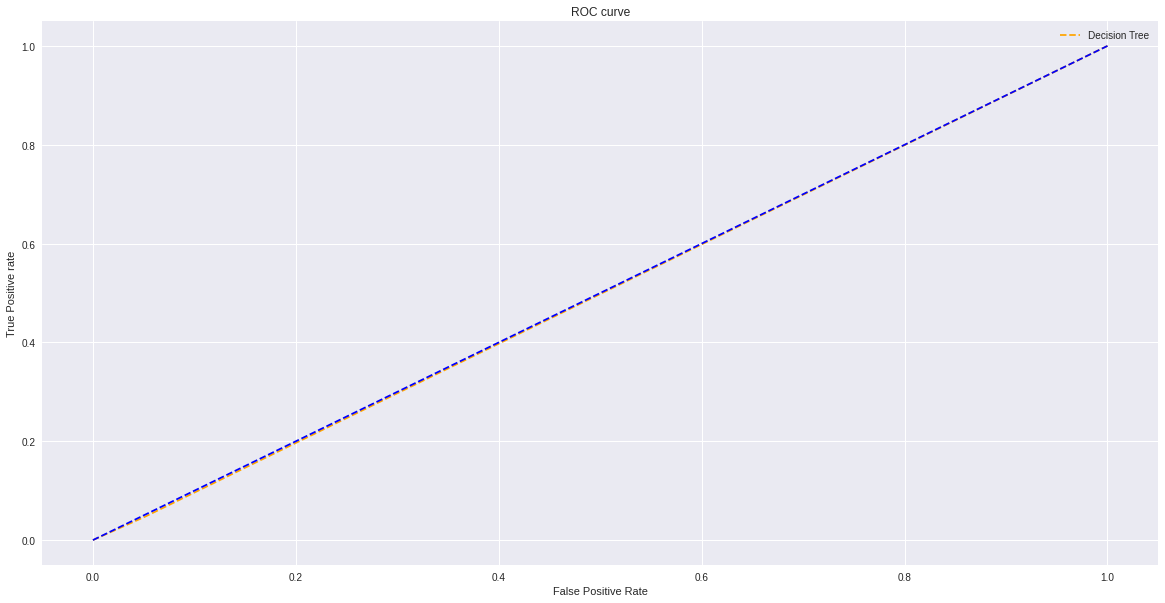

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_features = "sqrt", random_state = 0)

#Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)
predictions = [round(value) for value in y_pred_dt]

accuracies = {}

dt_accuracy = round(accuracy_score(y_test, y_pred_dt),8)
print(color.BOLD + "Accuracy:", dt_accuracy)

accuracies['Decision Tree'] = dt_accuracy

print("F1 Score: ", round(f1_score(y_test, y_pred_dt, average = "macro"),8))

print("Precision: ", round(precision_score(y_test, y_pred_dt, average = "macro"),8))

print("Recall: ", round(recall_score(y_test, y_pred_dt, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix\n ", cm)

loss = log_loss(y_test, y_pred_dt)
print('\nLog Loss / Cross Entropy = {:.4f}'.format(loss))

#ROC AUC
pred_prob = clf.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC score: ", auc_score)

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

It is bad, we need to tune

**Hyperparameter tuning of Decision Tree**



**Randomized Search CV**

(We could tune parameters with Grid Search CV but that takes lot of time because it goes value by value but performs better)

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 70),
              "min_samples_leaf": randint(1, 70),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("\nTuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("\nBest score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 17, 'min_samples_leaf': 37}

Best score is 0.9842155203615481


Accuracy: 0.98420946
F1 Score:  0.49602095
Precision:  0.49210473
Recall:  0.5

Confusion Matrix
  [[270882      0]
 [  4346      0]]

Log Loss / Cross Entropy = 0.5454
AUC score:  0.5692534706544838


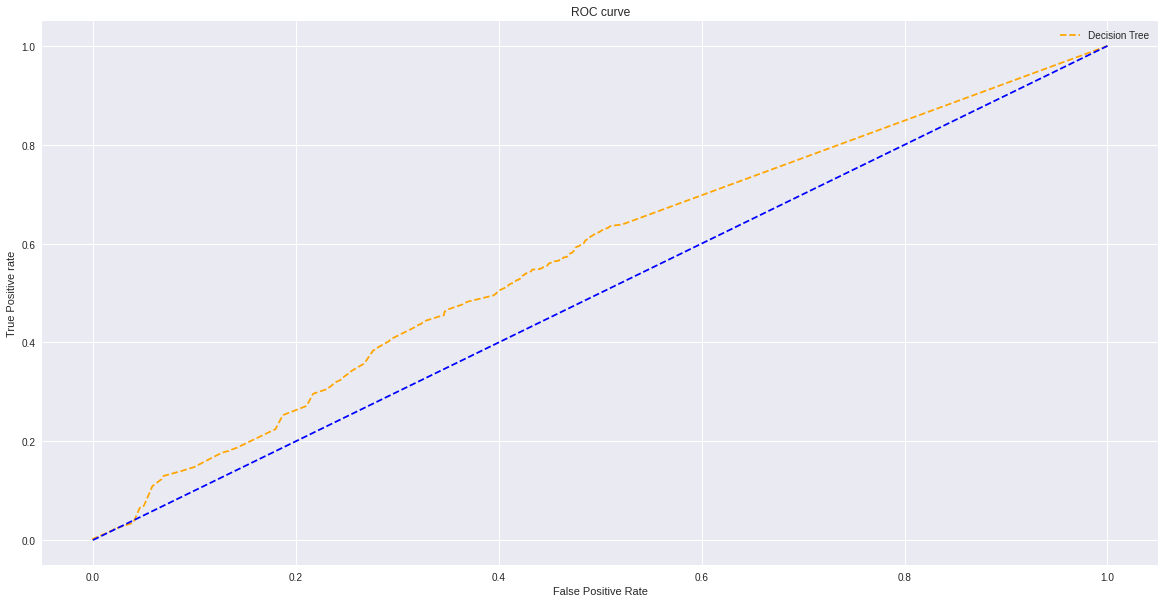

In [ ]:
#Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = 'gini', max_features =  5, min_samples_leaf = 24)

#Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)
predictions = [round(value) for value in y_pred_dt]

dt_accuracy = round(accuracy_score(y_test, y_pred_dt),8)
print(color.BOLD + "Accuracy:", dt_accuracy)

print("F1 Score: ", round(f1_score(y_test, y_pred_dt, average = "macro"),8))

print("Precision: ", round(precision_score(y_test, y_pred_dt, average = "macro"),8))

print("Recall: ", round(recall_score(y_test, y_pred_dt, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix\n ", cm)

loss = log_loss(y_test, y_pred_dt)
print('\nLog Loss / Cross Entropy = {:.4f}'.format(loss))

#ROC AUC
pred_prob = clf.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

In [ ]:
#from sklearn import tree
#tree.plot_tree(clf) 

#Takes lot of time, best run on GPU

**Random Forest Classifier**

Accuracy: 0.98420946
F1 Score:  0.49602095
Precision:  0.49210473
Recall:  0.5

Confusion Matrix
  [[270882      0]
 [  4346      0]]

Log Loss / Cross Entropy = 0.5454
AUC score:  0.6723985705260006


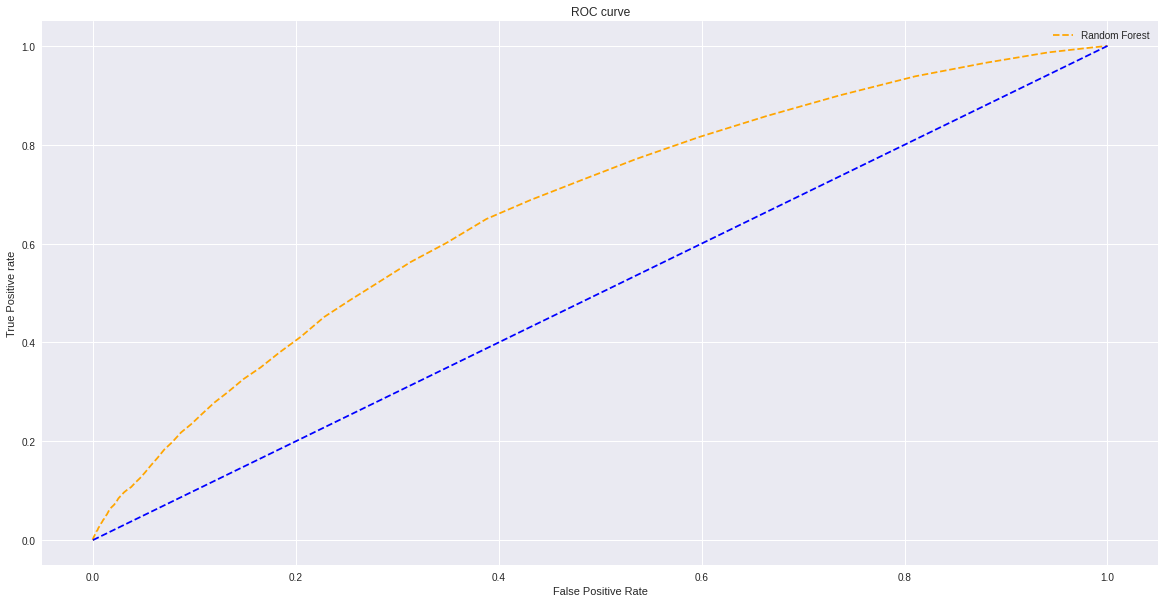

In [ ]:
#Random forests is a technique of bagging where in bootstrapping is performed by distributing features to various models that are created
#Then Aggregation takes the majority as the output
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 220, criterion = "gini", max_features = "sqrt")

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
predictions = [round(value) for value in y_pred_rf]

rf_accuracy = round(accuracy_score(y_test, y_pred_rf),8)
print(color.BOLD + "Accuracy:", rf_accuracy)

accuracies['Random Forest'] = rf_accuracy

print("F1 Score: ", round(f1_score(y_test, y_pred_rf, average = "macro"),8))

print("Precision: ", round(precision_score(y_test, y_pred_rf, average = "macro"),8))

print("Recall: ", round(recall_score(y_test, y_pred_rf, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix\n ", cm)

loss = log_loss(y_test, y_pred_rf)
print('\nLog Loss / Cross Entropy = {:.4f}'.format(loss))

#ROC AUC
pred_prob = rf.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Random Forest')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

**XG Boost Classifier**

Accuracy: 0.98287238
F1 Score:  0.50687893
Precision:  0.54891201
Recall:  0.50543367

Confusion Matrix
  [[270460    422]
 [  4292     54]]

Log Loss / Cross Entropy = 0.5916
AUC score:  0.7026693957380986


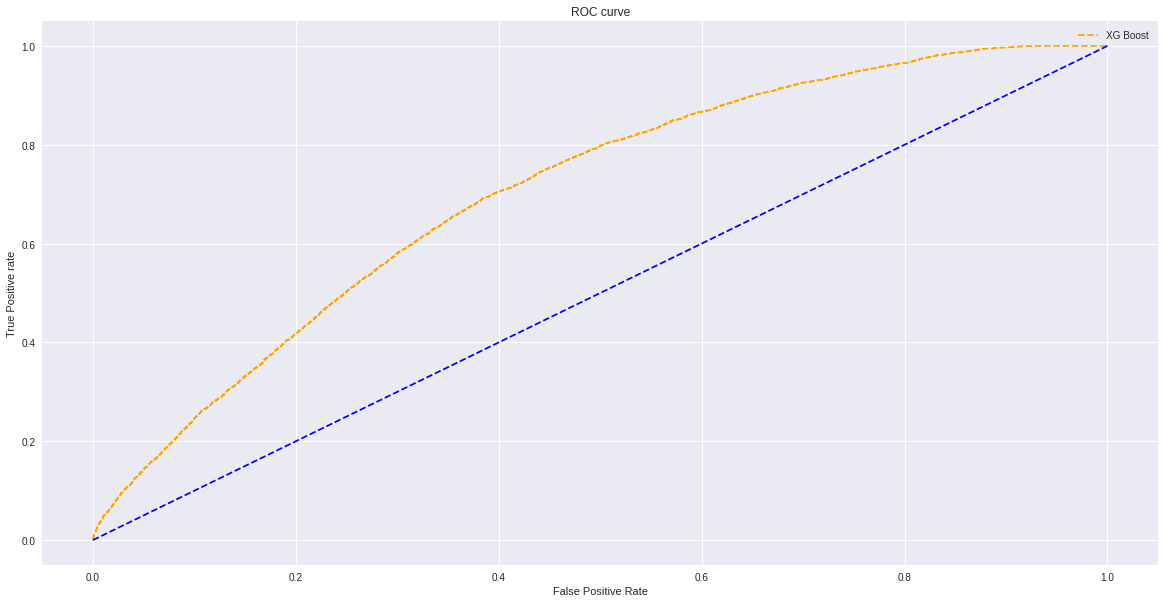

In [ ]:
#Boosting techniques combine weak learners to form strong classifiers
from xgboost import XGBClassifier

xg = XGBClassifier(criterion = 'logloss', n_estimators = 210, max_depth = 8)

xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)
predictions = [round(value) for value in y_pred_xg]

xg_accuracy = round(accuracy_score(y_test, y_pred_xg),8)
print(color.BOLD + "Accuracy:", xg_accuracy)

accuracies['XG Boost'] = xg_accuracy

print("F1 Score: ", round(f1_score(y_test, y_pred_xg, average = "macro"),8))

print("Precision: ", round(precision_score(y_test, y_pred_xg, average = "macro"),8))

print("Recall: ", round(recall_score(y_test, y_pred_xg, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_xg)
print("\nConfusion Matrix\n ", cm)

loss = log_loss(y_test, y_pred_xg)
print('\nLog Loss / Cross Entropy = {:.4f}'.format(loss))

#ROC AUC
pred_prob = xg.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'XG Boost')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

**Logistic Regression**

Accuracy: 0.98410409
F1 Score:  0.97632433
Precision:  0.96866661
Recall:  0.98410409

Confusion Matrix
  [[270853     29]
 [  4346      0]]

Log Loss / Cross Entropy = 0.5490
AUC score:  0.6262022320548056


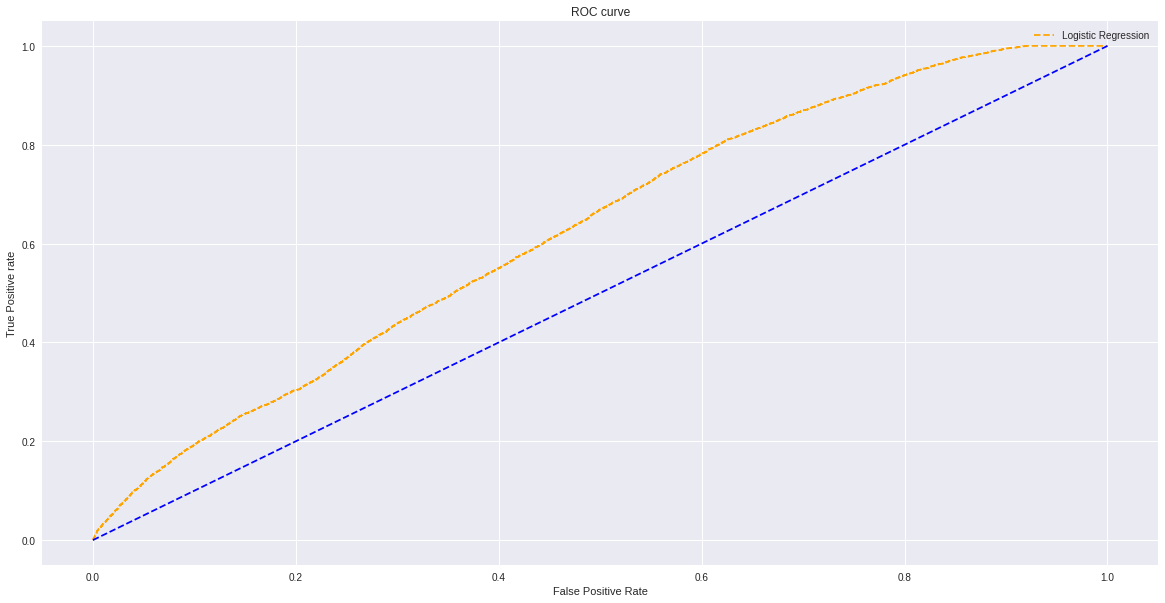

In [ ]:
#Logistic Regression is robust to outliers. It uses sigmoid curve to convert values, underneath a logit function is used
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter = 500)

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
predictions = [round(value) for value in y_pred_logreg]

logreg_accuracy = round(accuracy_score(y_test, y_pred_logreg),8)
print(color.BOLD + "Accuracy:", logreg_accuracy)

accuracies['Logistic Regression'] = logreg_accuracy

print("F1 Score: ", round(f1_score(y_test, y_pred_logreg, average = "weighted"),8))

print("Precision: ", round(precision_score(y_test, y_pred_logreg, average = "weighted"),8))

print("Recall: ", round(recall_score(y_test, y_pred_logreg, average = "weighted"),8)) 

cm = confusion_matrix(y_test, y_pred_logreg)
print("\nConfusion Matrix\n ", cm)

loss = log_loss(y_test, y_pred_logreg)
print('\nLog Loss / Cross Entropy = {:.4f}'.format(loss))

#ROC AUC
pred_prob = logreg.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC score: ", auc_score)

plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

**CatBoost Classifier**


     |████████████████████████████████| 67.4 MB 109 kB/s 
0:	learn: 0.0802175	total: 247ms	remaining: 54.1s
1:	learn: 0.0757252	total: 437ms	remaining: 47.6s
2:	learn: 0.0746842	total: 645ms	remaining: 46.7s
3:	learn: 0.0743450	total: 838ms	remaining: 45.3s
4:	learn: 0.0736663	total: 1.03s	remaining: 44.1s
5:	learn: 0.0727803	total: 1.24s	remaining: 44.4s
6:	learn: 0.0726940	total: 1.44s	remaining: 43.9s
7:	learn: 0.0725926	total: 1.64s	remaining: 43.5s
8:	learn: 0.0722711	total: 1.86s	remaining: 43.7s
9:	learn: 0.0718896	total: 2.08s	remaining: 43.8s
10:	learn: 0.0717073	total: 2.28s	remaining: 43.3s
11:	learn: 0.0715534	total: 2.49s	remaining: 43.2s
12:	learn: 0.0713362	total: 2.7s	remaining: 43s
13:	learn: 0.0711584	total: 2.91s	remaining: 42.9s
14:	learn: 0.0710020	total: 3.11s	remaining: 42.5s
15:	learn: 0.0709427	total: 3.31s	remaining: 42.2s
16:	learn: 0.0704700	total: 3.52s	remaining: 42s
17:	learn: 0.0702900	total: 3.72s	remaining: 41.8s
18:	learn: 0.0702212	total: 3.94s	remai

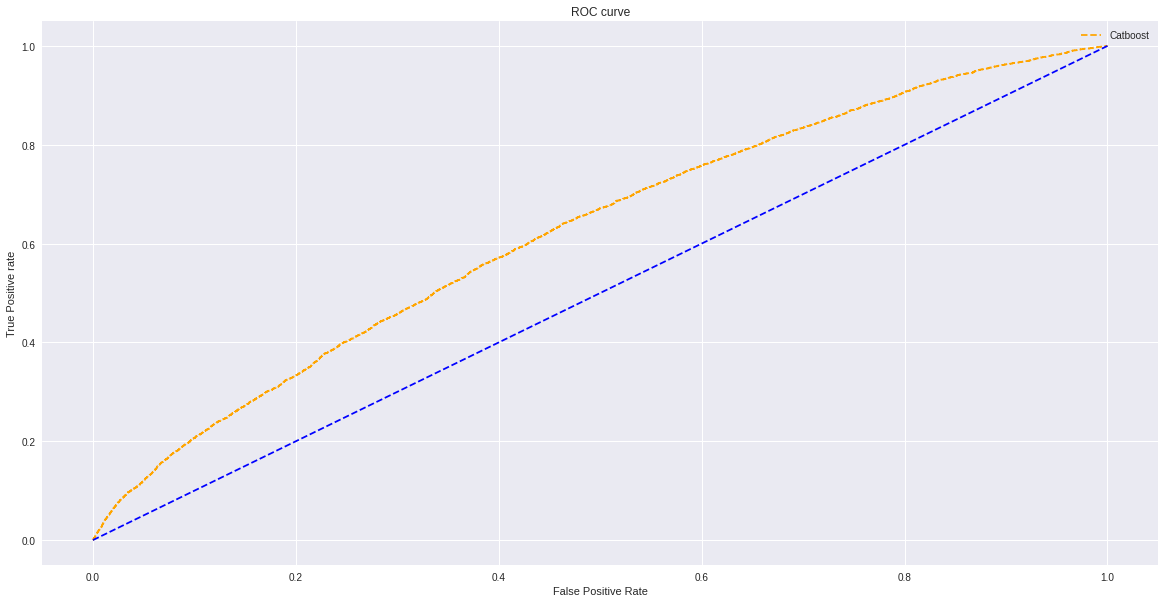

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
cb = CatBoostClassifier(iterations = 220,
                           learning_rate = 1)
# Fit model
cb.fit(X_train, y_train)

y_pred_cb = cb.predict(X_test)
predictions = [round(value) for value in y_pred_cb]

cb_accuracy = round(accuracy_score(y_test, y_pred_cb),8)
print(color.BOLD + "Accuracy:", cb_accuracy)

accuracies['Catboost Classifier'] = cb_accuracy

print("F1 Score: ", round(f1_score(y_test, y_pred_cb, average = "macro"),8))

print("Precision: ", round(precision_score(y_test, y_pred_cb, average = "macro"),8))

print("Recall: ", round(recall_score(y_test, y_pred_cb, average = "macro"),8)) 

cm = confusion_matrix(y_test, y_pred_cb)
print("\nConfusion Matrix\n ", cm)

loss = log_loss(y_test, y_pred_cb)
print('\nLog Loss / Cross Entropy = {:.4f}'.format(loss))

#ROC AUC
pred_prob = cb.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score
# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])

print("AUC score: ", auc_score)

import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'orange', label = 'Catboost')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'blue')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')

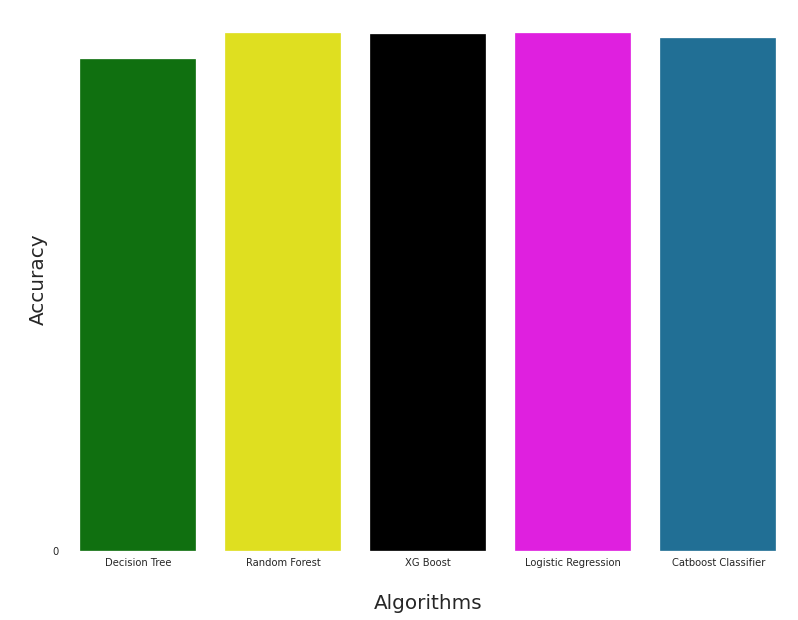

In [ ]:
#Plotting accuracies of all the models
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
colors = ["green", "yellow", "black", "magenta", "#0e76a8", "red", "#34558b","#f0daa4","#3b3d4b","#fd823e"]

sns.set_style("whitegrid")
plt.figure(figsize = (13,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("\nAccuracy", fontsize = 20)
plt.xlabel("\nAlgorithms", fontsize = 20)
sns.barplot(x = list(accuracies.keys()), y  =list(accuracies.values()), palette = colors)
plt.show()

**The recommended models based on ROC-AUC, F1 Score, Confusion matrix are -**

1.   **XG Boost**
2.   **Random Forests** 



In [ ]:
#Exporting the model using joblib library
import joblib
joblib.dump(xg,"FraudDetection_2021_Sept.pkl")

['FraudDetection_2021_Sept.pkl']

**Dataset has majorly less fraudulent transactions. So, models are not overfitted or underfitted and hyperparameter tuning (GridSearch CV or RandomizedSearch CV) can be done to further increase the metrics and to choose best params**

**Things I would do if I had more time and CPU power ...**

1. I would take an in-depth approach to Feature Engineering to identify relations between features if I had more time. I would do so to create new features so that I could develop clusters(after binning) using K-Means to analyze the data. After that, I would reduce the number of features using PCA.

2. I would try out Cross Validation using K-Fold if I had more RAM in my system

3. I would Feature Engineer the 2 categorical variables 'accountNumber' and 'merchantName'.

4. I would perform Random UnderSampling as the target variable is skewed

5. I'd also develop a Neural Network for this dataset to predict 'isFraud'

6. I would hyperparameter tune all the algorithms to find out the best parameters if I had better CPU power(Lately, Colab's free tier limits threshold is triggered faster I feel)

7. I would deploy the model after building a Web application using Flask Server or FastAPI and then move the application to AWS, Azure or Google Cloud

